Import libraries

Taken from website:-
https://ourworldindata.org/coronavirus-source-data

In [331]:
import pandas as pd
import numpy as np

Read files

In [332]:
# load datasets
train = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78867,ZWE,Africa,Zimbabwe,2021-03-28,36822.0,4.0,22.429,1520.0,1.0,1.143,2477.439,0.269,1.509,102.268,0.067,0.077,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1098.0,431711.0,29.046,0.074,2240.0,0.151,0.010,99.9,tests performed,79139.0,68511.0,10628.0,5708.0,5201.0,0.53,0.46,0.07,350.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
78868,ZWE,Africa,Zimbabwe,2021-03-29,36839.0,17.0,22.143,1520.0,0.0,0.857,2478.583,1.144,1.490,102.268,0.000,0.058,0.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1467.0,433178.0,29.145,0.099,2115.0,0.142,0.010,95.5,tests performed,81610.0,69751.0,11859.0,2471.0,5434.0,0.55,0.47,0.08,366.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
78869,ZWE,Africa,Zimbabwe,2021-03-30,36839.0,0.0,17.429,1520.0,0.0,0.571,2478.583,0.000,1.173,102.268,0.000,0.038,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2675.0,435853.0,29.325,0.180,2248.0,0.151,0.008,129.0,tests performed,85866.0,72944.0,12922.0,4256.0,5810.0,0.58,0.49,0.09,391.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
78870,ZW

In [333]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [334]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78872 entries, 0 to 78871
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               78872 non-null  object 
 1   continent                              75022 non-null  object 
 2   location                               78872 non-null  object 
 3   date                                   78872 non-null  object 
 4   total_cases                            77301 non-null  float64
 5   new_cases                              77299 non-null  float64
 6   new_cases_smoothed                     76298 non-null  float64
 7   total_deaths                           67892 non-null  float64
 8   new_deaths                             68050 non-null  float64
 9   new_deaths_smoothed                    76298 non-null  float64
 10  total_cases_per_million                76881 non-null  float64
 11  ne

Convert date to number

In [335]:
import datetime 

date = train.date

train['date'] = pd.to_datetime(train['date'], errors='coerce')
train['date_num'] = train['date'].dt.strftime('%d%m%Y')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,24022020
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,25022020
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,26022020
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,27022020
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,28022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78867,ZWE,Africa,Zimbabwe,2021-03-28,36822.0,4.0,22.429,1520.0,1.0,1.143,2477.439,0.269,1.509,102.268,0.067,0.077,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1098.0,431711.0,29.046,0.074,2240.0,0.151,0.010,99.9,tests performed,79139.0,68511.0,10628.0,5708.0,5201.0,0.53,0.46,0.07,350.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,28032021
78868,ZWE,Africa,Zimbabwe,2021-03-29,36839.0,17.0,22.143,1520.0,0.0,0.857,2478.583,1.144,1.490,102.268,0.000,0.058,0.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1467.0,433178.0,29.145,0.099,2115.0,0.142,0.010,95.5,tests performed,81610.0,69751.0,11859.0,2471.0,5434.0,0.55,0.47,0.08,366.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,29032021
78869,ZWE,Africa,Zimbabwe,2021-03-30,36839.0,0.0,17.429,1520.0,0.0,0.571,2478.583,0.000,1.173,102.268,0.000,0.038,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2675.0,435853.0,29.325,0.180,2248.0,0.151,0.008,129.0,tests performed,85866.0,72944.0,12922.0,4256.0,5810.0,0.58,0.49,0.09,391.0,NaN,14862927.0,42.729,19.6,2.8

Country

In [336]:
country = train['location'].to_list()

# using naive method to remove duplicated from list  
list_country = [] 
for i in country: 
    if i not in list_country: 
        list_country.append(i) 

list_country

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',
 'Faeroe Islands',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia

In [337]:
print(len(list_country))

215


Get latest date

In [338]:
from datetime import date 
from datetime import timedelta

In [339]:
today = date.today() 
print("Today is: ", today) 

Today is:  2021-04-02


In [340]:
yesterday = today - timedelta(days = 1) 
print("Yesterday was: ", yesterday)

Yesterday was:  2021-04-01


In [341]:
last_date = train.date.max()
last_date

Timestamp('2021-04-01 00:00:00')

In [342]:
print(type(last_date))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [343]:
yesterday = pd.Timestamp(yesterday)

In [344]:
print(type(yesterday))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [345]:
if last_date == yesterday: 
    last_date = yesterday
elif last_date > yesterday: 
    last_date = yesterday 
else: 
    last_date = last_date
last_date


Timestamp('2021-04-01 00:00:00')

In [346]:
last_date = train[train.date == last_date]
last_date

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
402,AFG,Asia,Afghanistan,2021-04-01,56517.0,63.0,41.571,2489.0,5.0,3.143,1451.821,1.618,1.068,63.938,0.128,0.081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,01042021
816,OWID_AFR,NaN,Africa,2021-04-01,4239457.0,22144.0,13054.857,113166.0,407.0,281.857,3162.362,16.518,9.738,84.415,0.304,0.210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11424210.0,7465743.0,4094775.0,249639.0,258138.0,0.85,0.56,0.31,193.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01042021
1218,ALB,Europe,Albania,2021-04-01,125506.0,349.0,391.286,2241.0,6.0,8.143,43611.787,121.273,135.967,778.720,2.085,2.830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2899.0,539484.0,187.464,1.007,2798.0,0.972,0.140,7.2,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,01042021
1620,DZA,Africa,Algeria,2021-04-01,117304.0,112.0,108.714,3096.0,3.0,3.571,2675.056,2.554,2.479,70.603,0.068,0.081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,01042021
2016,AND,Europe,Andorra,2021-04-01,12053.0,43.0,52.286,115.0,0.0,0.143,155995.600,556.526,676.706,1488.384,0.000,1.849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,01042021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77320,VNM,Asia,Vietnam,2021-04-01,2617.0,14.0,5.429,35.0,0.0,0.000,26.886,0.144,0.056,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704,01042021
77756,OWID_WRL,NaN,World,2021-04-01,129607542.0,711621.0,588166.857,2827520.0,11861.0,10296.714,16627.439,91.294,75.456,362.744,1.522,1.321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,617027408.0,345380949.0,135064161.0,18926433.0,15465187.0,7.92,4.43,1.73,1984.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,01042021
78113,YEM,Asia,Yemen,2021-04-01,4531.0,174.0,102.143,906.0,18.0,13.714,151.915,5.834,3.425,30.376,0.604,0.460,NaN,NaN,NaN,Na

Graphical representation

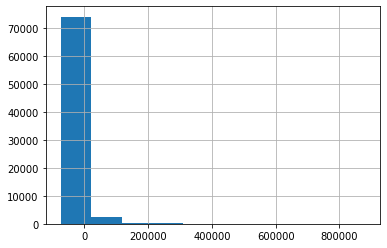

In [347]:
from matplotlib import pyplot as plt

train.new_cases.hist()

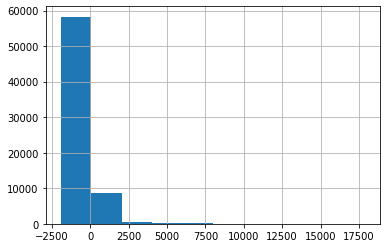

In [348]:
train.new_deaths.hist()

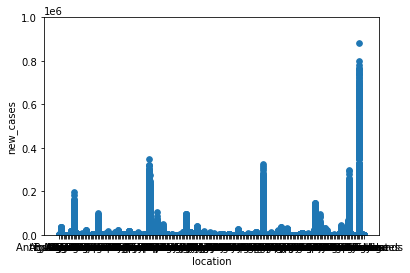

In [349]:
var = 'location'
data = pd.concat([train['new_cases'], train[var]], axis=1)
data.plot.scatter(x=var, y='new_cases', ylim=(0,1000000), s=32);

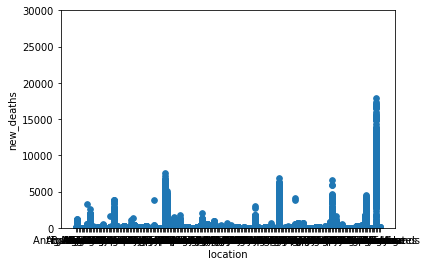

In [350]:
var = 'location'
data = pd.concat([train['new_deaths'], train[var]], axis=1)
data.plot.scatter(x=var, y='new_deaths', ylim=(0,30000), s=32);

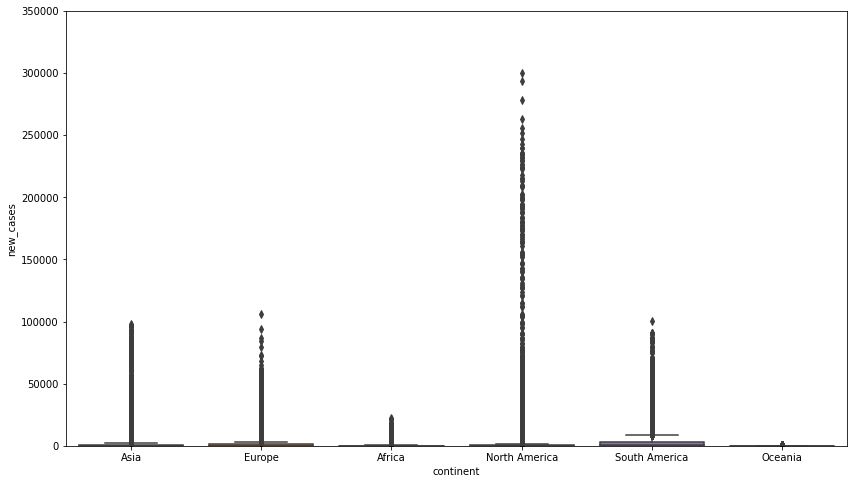

In [351]:
import seaborn as sns

var = 'continent'
data = pd.concat([train['new_cases'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_cases", data=data)
fig.axis(ymin=0, ymax=350000);

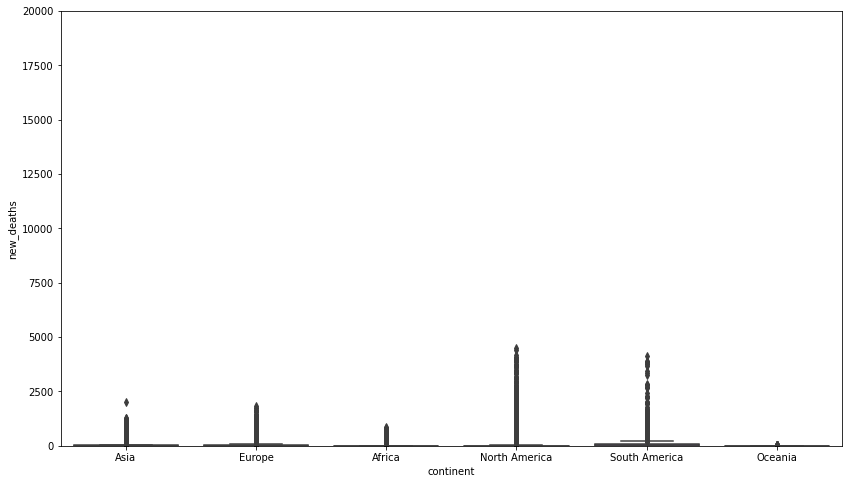

In [352]:
var = 'continent'
data = pd.concat([train['new_deaths'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_deaths", data=data)
fig.axis(ymin=0, ymax=20000);

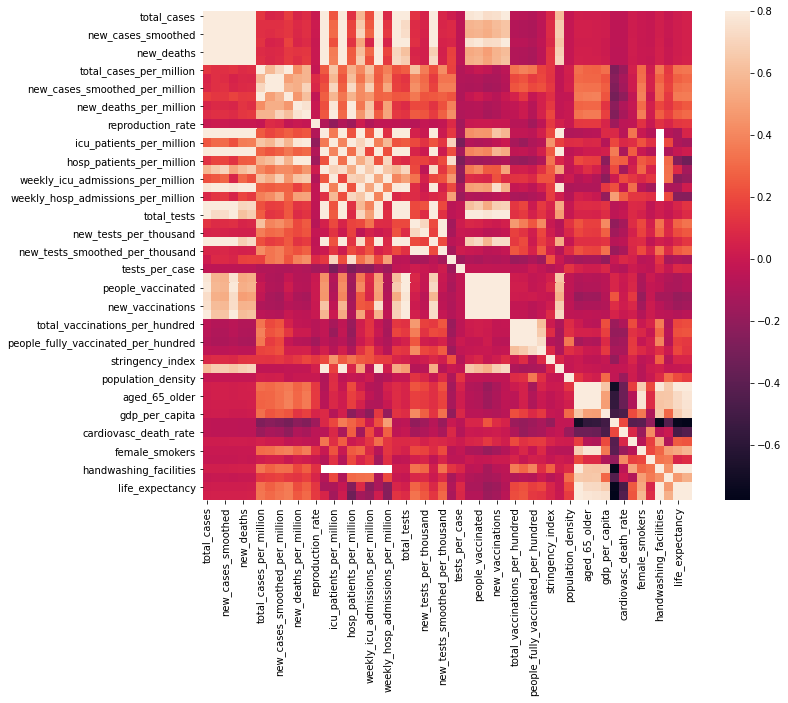

In [353]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

UK

In [354]:
country = "United Kingdom"

include_uk = train[train['location'].values == country]
exclude_uk = train[train['location'].values != country]
uk_cov19 = include_uk
uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
74336,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,31012020
74337,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,01022020
74338,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,02022020
74339,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,03022020
74340,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,04022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74758,GBR,Europe,United Kingdom,2021-03-28,4347013.0,3947.0,5259.714,126834.0,21.0,63.000,64034.009,58.142,77.479,1868.338,0.309,0.928,0.87,582.0,8.573,4170.0,61.427,NaN,NaN,2241.0,33.011,1641942.0,121071863.0,1783.458,24.187,1209889.0,17.822,0.004,230.0,tests performed,34119095.0,30444829.0,3674266.0,440327.0,548534.0,50.26,44.85,5.41,8080.0,75.93,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,28032021
74759,GBR,Europe,United Kingdom,2021-03-29,4351796.0,4783.0,5170.571,126857.0,23.0,63.714,64104.465,70.456,76.165,1868.677,0.339,0.939,0.87,583.0,8.588,4180.0,61.574,NaN,NaN,NaN,NaN,972317.0,122092382.0,1798.491,14.323,1165961.0,17.175,0.004,225.5,tests performed,34518958.0,30680948.0,3838010.0,399863.0,546772.0,50.85,45.19,5.65,8054.0,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,29032021
74760,GBR,Europe,United Kingdom,2021-03-30,4355867.0,4071.0,4978.286,126912.0,55.0,55.571,64164.434,59.968,73.33

Text(0, 0.5, 'uk_new_cases_per_million')

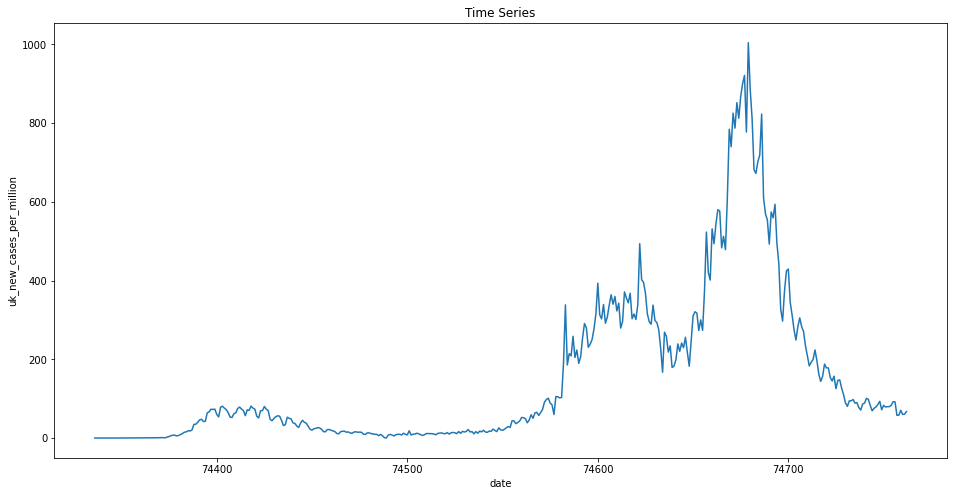

In [355]:
import matplotlib.pyplot as plt

uk_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("uk_new_cases_per_million")

Text(0, 0.5, 'uk_new_deaths_per_million')

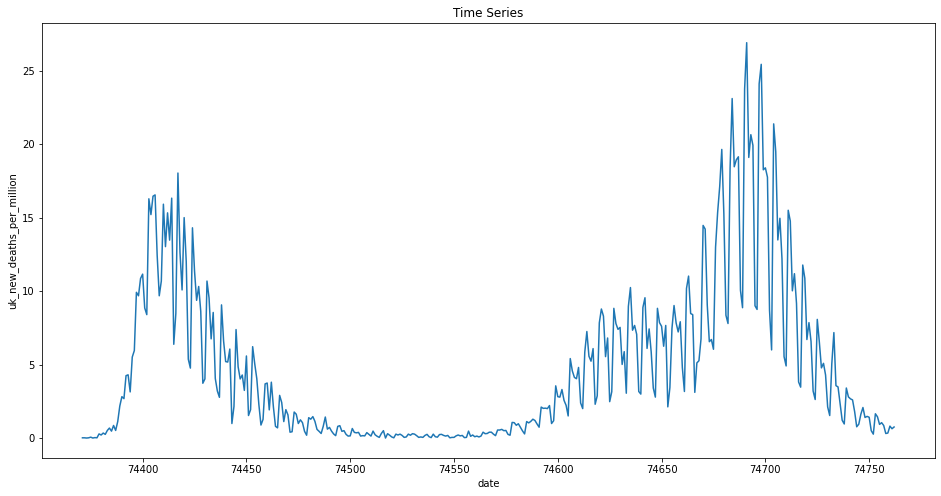

In [356]:
uk_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("uk_new_deaths_per_million")

US

In [357]:
country = "United States"

include_us = train[train['location'].values == country]
exclude_us = train[train['location'].values != country]
us_cov19 = include_us
us_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
74763,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,22012020
74764,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,23012020
74765,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,24012020
74766,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,25012020
74767,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,26012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75194,USA,North America,United States,2021-03-28,30263042.0,43694.0,63233.000,549420.0,507.0,970.571,91428.399,132.005,191.035,1659.866,1.532,2.932,1.10,NaN,NaN,NaN,NaN,NaN,NaN,30675.0,92.673,494171.0,374943029.0,1132.749,1.493,1135023.0,3.429,0.054,18.5,tests performed,143462691.0,93631163.0,51593564.0,3281956.0,2711611.0,42.90,28.00,15.43,8108.0,61.57,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,28032021
75195,USA,North America,United States,2021-03-29,30332461.0,69419.0,65782.286,550121.0,701.0,990.429,91638.122,209.723,198.736,1661.984,2.118,2.992,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,578493.0,375521522.0,1134.497,1.748,1086215.0,3.282,0.057,17.5,tests performed,145812835.0,95015762.0,52614231.0,2350144.0,2757586.0,43.60,28.41,15.73,8245.0,58.80,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,29032021
75196,USA,North America,United States,2021-03-30,30393701.0,61240.0,66875.5

Text(0, 0.5, 'us_new_cases_per_million')

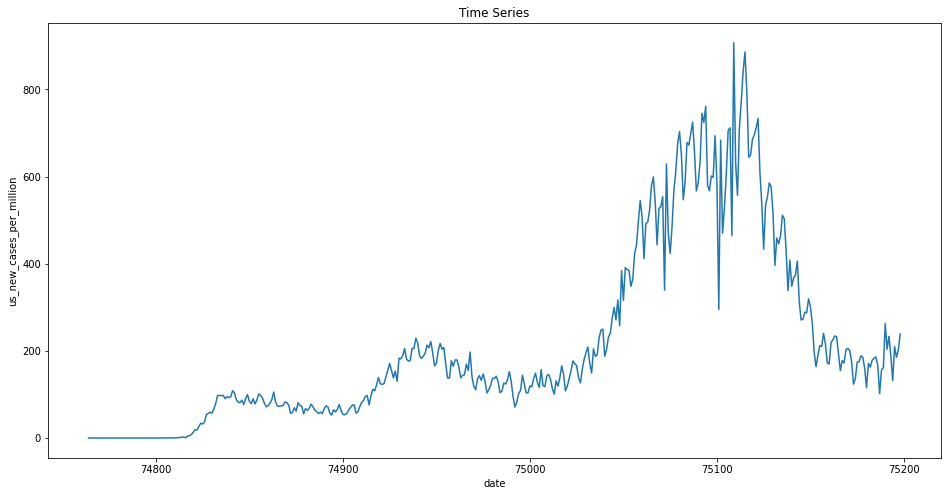

In [358]:
us_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_cases_per_million")

Text(0, 0.5, 'us_new_deaths_per_million')

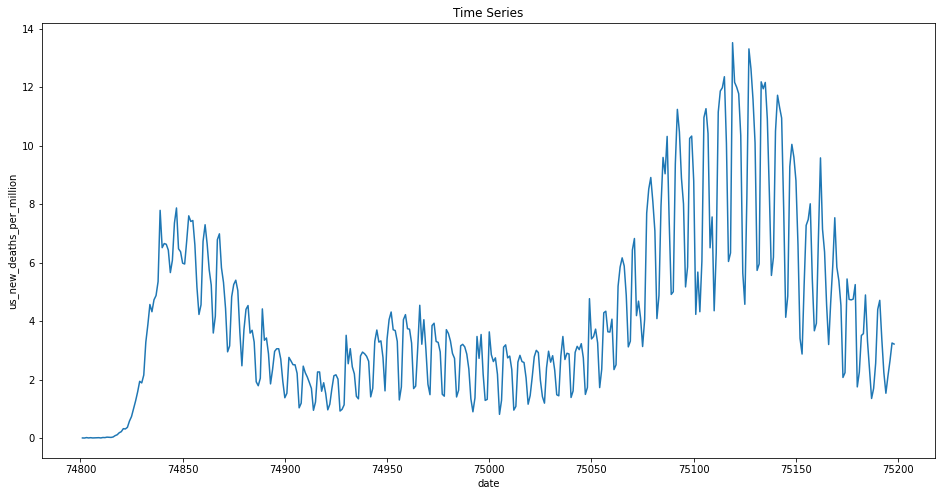

In [359]:
us_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_deaths_per_million")

Italy

In [360]:
country = "France"

include_fr = train[train['location'].values == country] 
exclude_fr = train[train['location'].values != country]
fr_cov19 = include_fr
fr_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
25759,FRA,Europe,France,2020-01-24,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,24012020
25760,FRA,Europe,France,2020-01-25,3.0,1.0,NaN,NaN,NaN,NaN,0.044,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,25012020
25761,FRA,Europe,France,2020-01-26,3.0,0.0,NaN,NaN,NaN,NaN,0.044,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,26012020
25762,FRA,Europe,France,2020-01-27,3.0,0.0,NaN,NaN,NaN,NaN,0.044,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,27012020
25763,FRA,Europe,France,2020-01-28,4.0,1.0,NaN,NaN,NaN,NaN,0.059,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,28012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26188,FRA,Europe,France,2021-03-28,4606185.0,37021.0,37584.000,94754.0,131.0,331.571,67591.216,543.247,551.508,1390.421,1.922,4.865,1.19,4872.0,71.492,27712.0,406.646,2742.298,40.241,12420.818,182.263,62617.0,NaN,NaN,0.919,464412.0,6.815,0.082,12.2,people tested,10453534.0,7798091.0,2655443.0,59291.0,260637.0,15.34,11.44,3.90,3825.0,NaN,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,28032021
26189,FRA,Europe,France,2021-03-29,4615295.0,9110.0,36626.429,95114.0,360.0,334.000,67724.896,133.680,537.457,1395.704,5.283,4.901,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685140.0,NaN,NaN,10.054,477823.0,7.012,0.082,12.2,people tested,10714250.0,8004958.0,2709292.0,260716.0,268510.0,15.72,11.75,3.98,3940.0,NaN,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,29032021
26190,FRA,Europe,France,2021-03-30,4646014.0,30719.0,38915.286,95495.0,381.0,347.286,68175.667,450.771,571.043,1401.295,5.591,5.096,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Text(0, 0.5, 'france_new_cases_per_million')

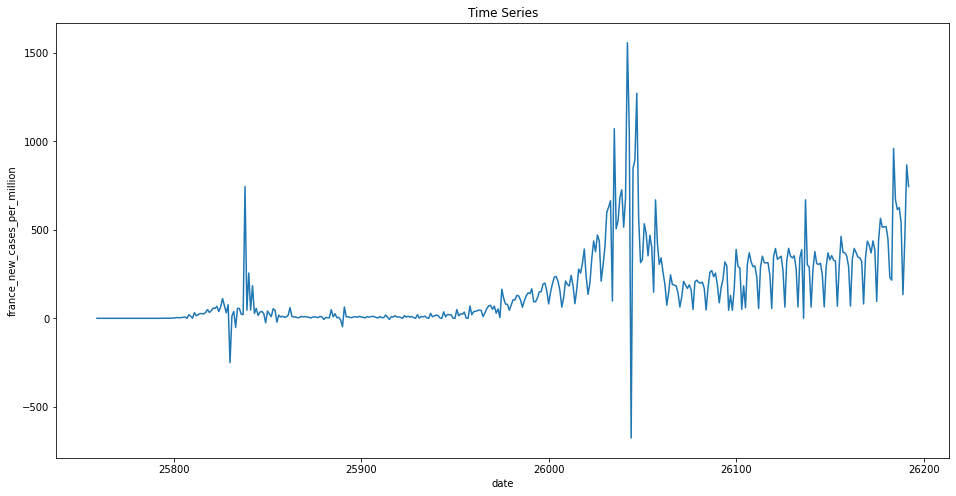

In [361]:
fr_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("france_new_cases_per_million")

Text(0, 0.5, 'france_new_deaths_per_million')

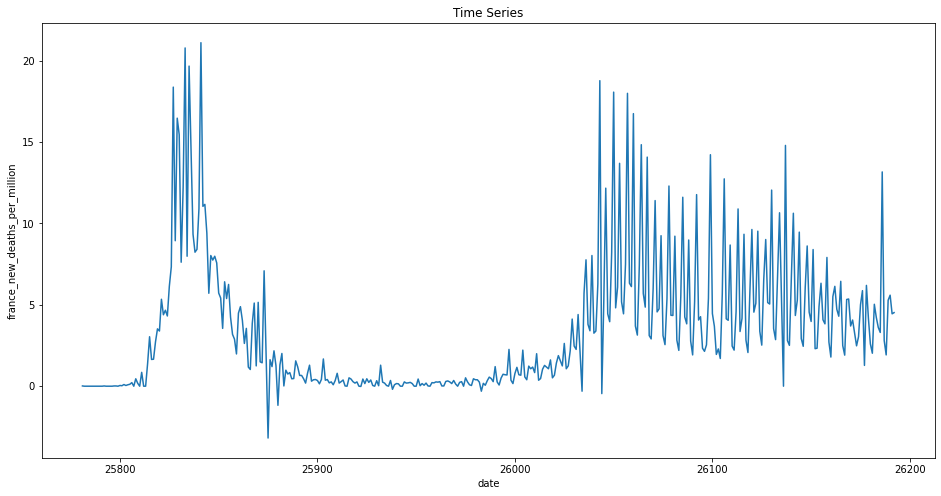

In [362]:
fr_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("france_new_deaths_per_million")

In [363]:
country = "Italy"

include_it = train[train['location'].values == country] 
exclude_it = train[train['location'].values != country]
it_cov19 = include_it
it_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
35297,ITA,Europe,Italy,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.033,0.033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,31012020
35298,ITA,Europe,Italy,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.033,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,01022020
35299,ITA,Europe,Italy,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.033,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,02022020
35300,ITA,Europe,Italy,2020-02-03,2.0,0.0,NaN,NaN,NaN,NaN,0.033,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,03022020
35301,ITA,Europe,Italy,2020-02-04,2.0,0.0,NaN,NaN,NaN,NaN,0.033,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,04022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35719,ITA,Europe,Italy,2021-03-28,3532057.0,19604.0,22240.143,107933.0,297.0,427.286,58417.966,324.238,367.838,1785.143,4.912,7.067,0.93,3679.0,60.848,32380.0,535.545,NaN,NaN,6727.275,111.265,272630.0,49093293.0,811.972,4.509,314627.0,5.204,0.071,14.1,tests performed,9474182.0,6491703.0,2982479.0,159426.0,223943.0,15.67,10.74,4.93,3704.0,NaN,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,28032021
35720,ITA,Europe,Italy,2021-03-29,3544957.0,12900.0,20582.857,108350.0,417.0,431.714,58631.324,213.358,340.427,1792.040,6.897,7.140,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156692.0,49249985.0,814.563,2.592,312841.0,5.174,0.066,15.2,tests performed,9709503.0,6661853.0,3047650.0,235321.0,230530.0,16.06,11.02,5.04,3813.0,NaN,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,29032021
35721,ITA,Europe,Italy,2021-03-30,3561012.0,16055.0,20199.429,108879.0,529.0,428.571,58896.863,265.539,334.086,1800.789,8.749,7.088,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301451.0,49551436.0,8

Text(0, 0.5, 'italy_new_cases_per_million')

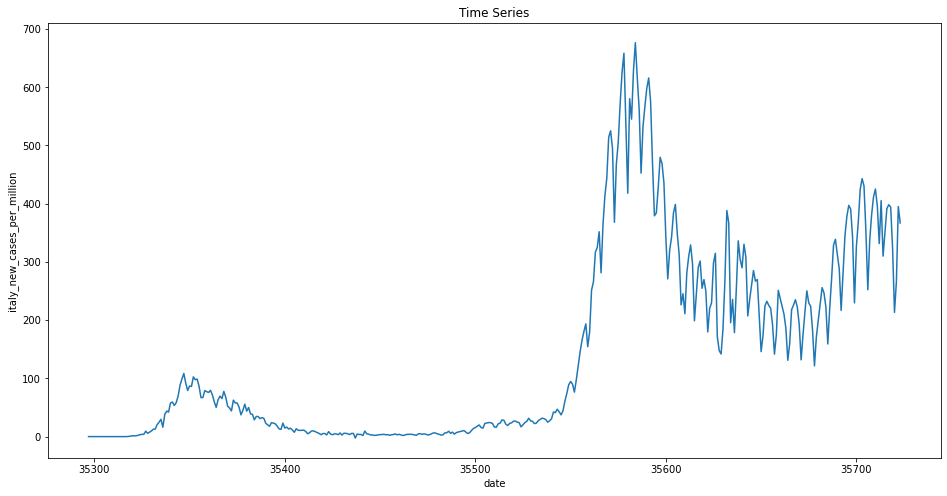

In [364]:
it_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("italy_new_cases_per_million")

Text(0, 0.5, 'italy_new_deaths_per_million')

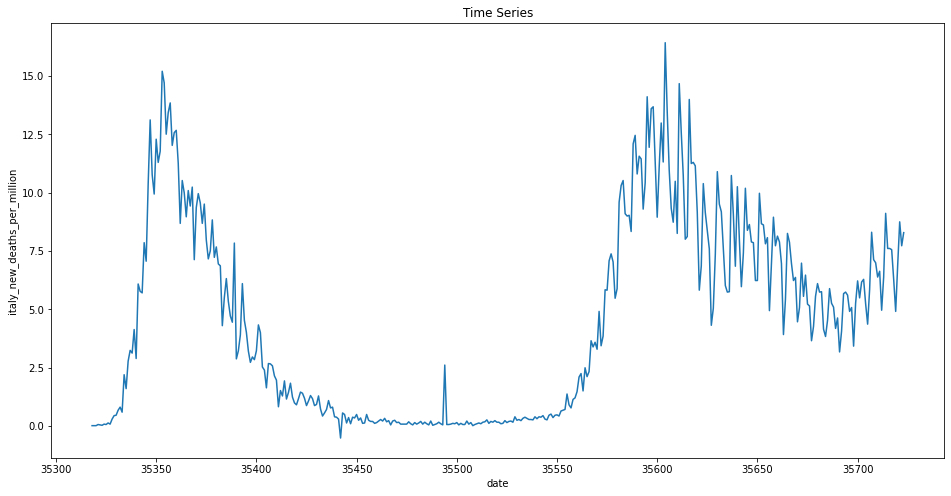

In [365]:
it_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("italy_new_deaths_per_million")

Brazil

In [366]:
country = "Brazil"

include_br = train[train['location'].values == country] 
exclude_br = train[train['location'].values != country]
br_cov19 = include_br
br_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
10102,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,26022020
10103,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,27022020
10104,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,28022020
10105,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,29022020
10106,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,01032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10498,BRA,South America,Brazil,2021-03-28,12534688.0,44326.0,76636.429,312206.0,1656.0,2594.857,58970.281,208.535,360.541,1468.794,7.791,12.208,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17706983.0,13659406.0,4047577.0,187900.0,592115.0,8.33,6.43,1.90,2786.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,28032021
10499,BRA,South America,Brazil,2021-03-29,12573615.0,38927.0,75155.571,313866.0,1660.0,2634.429,59153.415,183.135,353.574,1476.604,7.810,12.394,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18082153.0,13988029.0,4094124.0,375170.0,566513.0,8.51,6.58,1.93,2665.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,29032021
10500,BRA,South America,Brazil,2021-03-30,12658109.0,84494.0,75441.429,317646.0,3780.0,2710.000,59550.923,397.508,354.919,1494.387,17.783,12.749,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18222559.0,14112509.0,4110050.0,140406.0,430

Text(0, 0.5, 'brazil_new_cases_per_million')

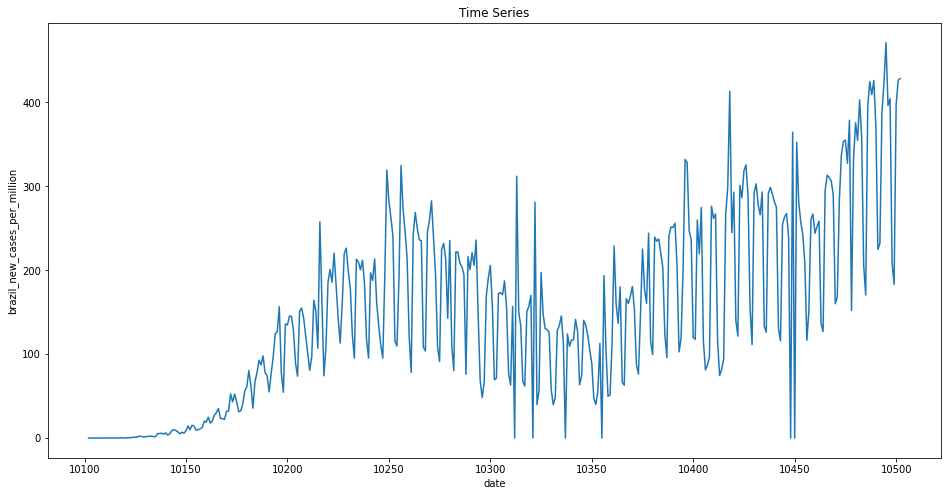

In [367]:
br_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("brazil_new_cases_per_million")

Text(0, 0.5, 'brazil_new_deaths_per_million')

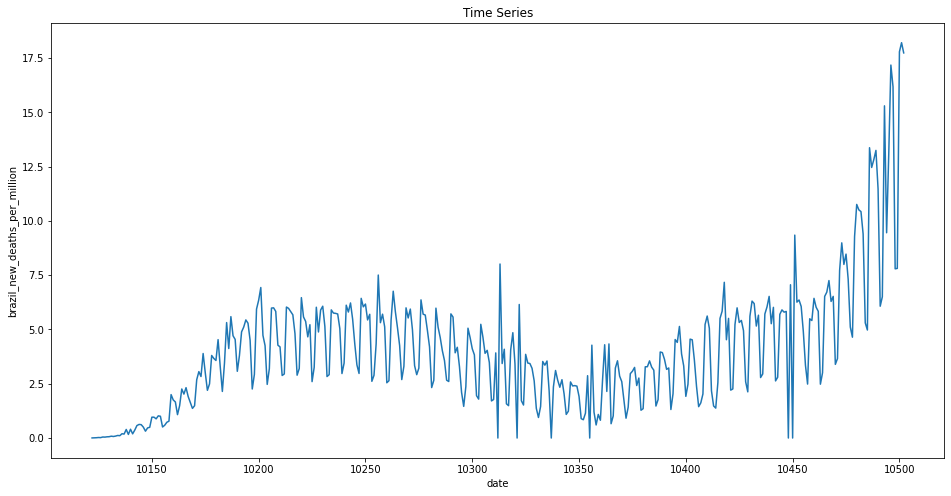

In [368]:
br_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("brazil_new_deaths_per_million")

Portugal

In [369]:
country = "Portugal"

include_p = train[train['location'].values == country]
exclude_p = train[train['location'].values != country]
p_cov19 = include_p
p_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
57198,PRT,Europe,Portugal,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.904,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,02022020
57199,PRT,Europe,Portugal,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.904,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,09022020
57200,PRT,Europe,Portugal,2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.846,1.554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,15022020
57201,PRT,Europe,Portugal,2020-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.807,1.943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,23022020
57202,PRT,Europe,Portugal,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.721,2.817,NaN,25.0,0.002,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,01032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57594,PRT,Europe,Portugal,2021-03-28,820407.0,365.0,411.000,16837.0,10.0,9.857,80458.034,35.796,40.307,1651.219,0.981,0.967,0.83,142.0,13.926,633.0,62.079,NaN,NaN,60.412,5.925,10845.0,9015124.0,884.121,1.064,25910.0,2.541,0.016,63.0,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.56,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,28032021
57595,PRT,Europe,Portugal,2021-03-29,820716.0,309.0,419.714,16843.0,6.0,8.429,80488.338,30.304,41.162,1651.808,0.588,0.827,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30104.0,9045228.0,887.073,2.952,25884.0,2.538,0.016,61.7,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.56,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,29032021
57596,PRT,Europe,Portugal,2021-03-30,821104.0,388.0,413.143,16845.0,2.0,7.286,80526.390,38.052,40.517,1652.004,0.196,0.715,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29159.0,9074387.0,889.933,2.860,25592.0,2.510,0.016,61.9,tests performed,NaN,NaN,NaN,NaN,

Text(0, 0.5, 'portugal_new_cases_per_million')

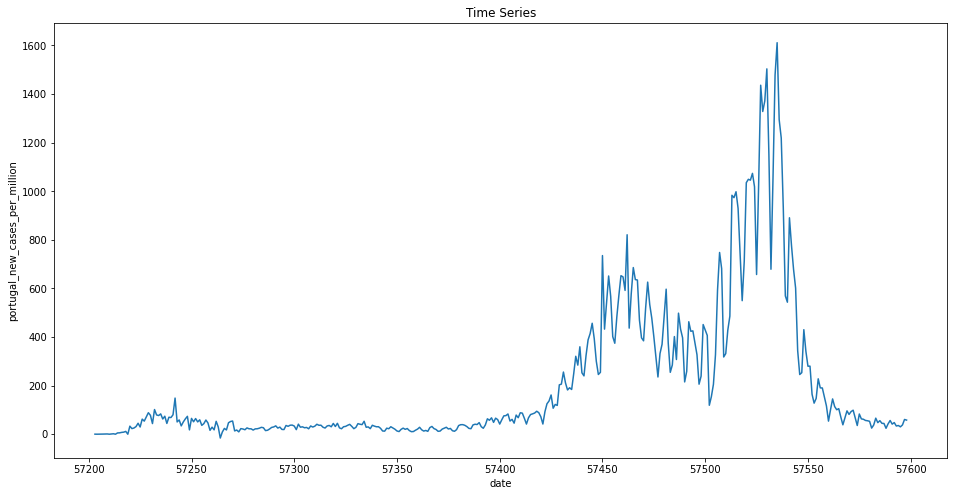

In [370]:
p_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("portugal_new_cases_per_million")

Text(0, 0.5, 'portugal_new_deaths_per_million')

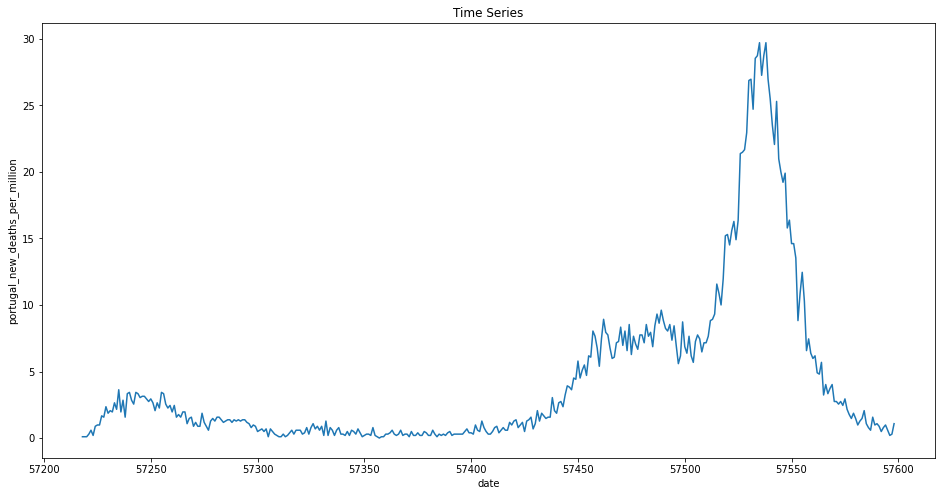

In [371]:
p_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("portugal_new_deaths_per_million")

Spain

In [372]:
country = "Spain"

include_sp = train[train['location'].values == country]
exclude_sp = train[train['location'].values != country]
sp_cov19 = include_sp
sp_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
66664,ESP,Europe,Spain,2020-02-01,1.0,1.0,NaN,NaN,NaN,NaN,0.021,0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,01022020
66665,ESP,Europe,Spain,2020-02-02,1.0,0.0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.963,0.063,18.768,0.401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,02022020
66666,ESP,Europe,Spain,2020-02-03,1.0,0.0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,03022020
66667,ESP,Europe,Spain,2020-02-04,1.0,0.0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,04022020
66668,ESP,Europe,Spain,2020-02-05,1.0,0.0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,05022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67085,ESP,Europe,Spain,2021-03-28,3255324.0,0.0,6141.714,75010.0,0.0,300.000,69625.476,0.000,131.360,1604.328,0.000,6.416,1.19,NaN,NaN,NaN,NaN,48.402,1.035,783.319,16.754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166235.0,NaN,NaN,NaN,3555.0,NaN,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,28032021
67086,ESP,Europe,Spain,2021-03-29,3270825.0,15501.0,6003.143,75199.0,189.0,236.571,69957.014,331.538,128.396,1608.370,4.042,5.060,1.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7571439.0,4967230.0,2604209.0,NaN,178504.0,16.19,10.62,5.57,3818.0,NaN,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,29032021
67087,ESP,Europe,Spain,2021-03-30,3275819.0,4994.0,5928.571,75305.0,106.0,223.000,70063.826,106.813,126.801,1610.637,2.267,4.770,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7736611.0,5092535.0,2644076.0,165172.0,189631.0,16.55,10.89,5.66,4056.0,NaN,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.

Text(0, 0.5, 'spain_new_cases_per_million')

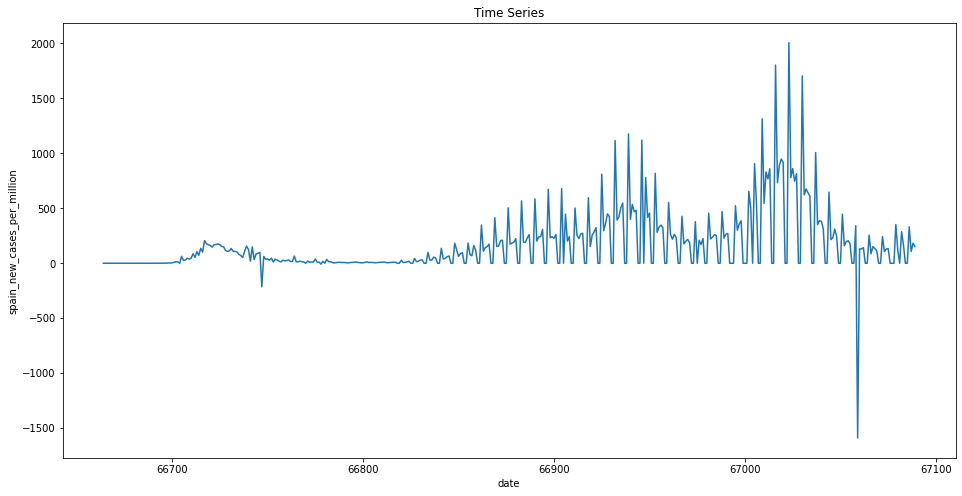

In [373]:
sp_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("spain_new_cases_per_million")

Text(0, 0.5, 'spain_new_deaths_per_million')

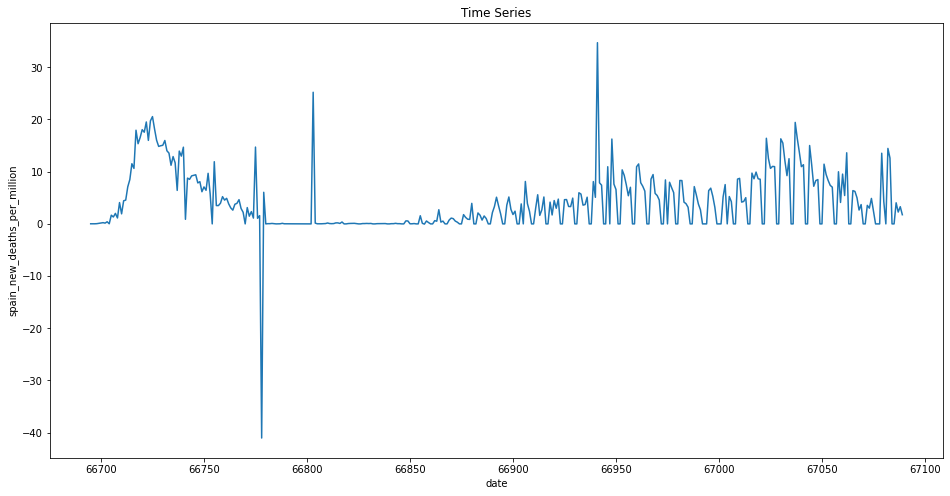

In [374]:
sp_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("spain_new_deaths_per_million")

India

In [375]:
country = "India"

include_i = train[train['location'].values == country]
exclude_i = train[train['location'].values != country]
i_cov19 = include_i
i_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
32362,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,30012020
32363,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,31012020
32364,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,01022020
32365,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,02022020
32366,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,03022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32785,IND,Asia,India,2021-03-28,12039644.0,68020.0,56223.286,161843.0,291.0,268.000,8724.352,49.290,40.741,117.277,0.211,0.194,1.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1181289.0,240950842.0,174.602,0.856,1073171.0,0.778,0.052,19.1,samples tested,60530435.0,51660234.0,8870201.0,260653.0,2209205.0,4.39,3.74,0.64,1601.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,28032021
32786,IND,Asia,India,2021-03-29,12095855.0,56211.0,58437.000,162114.0,271.0,278.286,8765.084,40.732,42.346,117.474,0.196,0.202,1.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,913319.0,241864161.0,175.263,0.662,1059770.0,0.768,0.055,18.1,samples tested,61113354.0,52211398.0,8901956.0,582919.0,1802680.0,4.43,3.78,0.65,1306.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,29032021
32787,IND,Asia,India,2021-03-30,12149335.0,53480.0,59325.286,162468.0,354.0,289.571,8803.838,38.754,42.989,117.730,0.257,0.210,1.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,785864.0,242650025.0,175.833,0.569,1033827.0,0.749

Text(0, 0.5, 'us_new_cases_per_million')

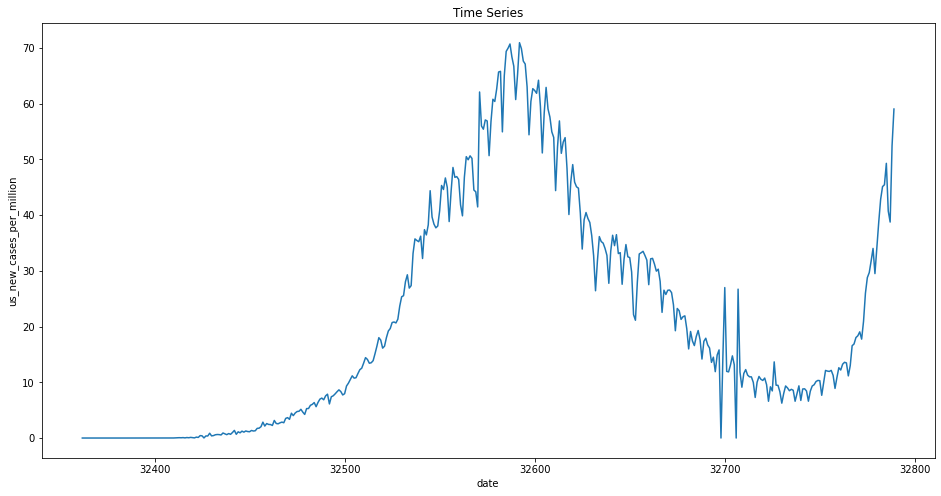

In [376]:
i_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_cases_per_million")

Text(0, 0.5, 'us_new_deaths_per_million')

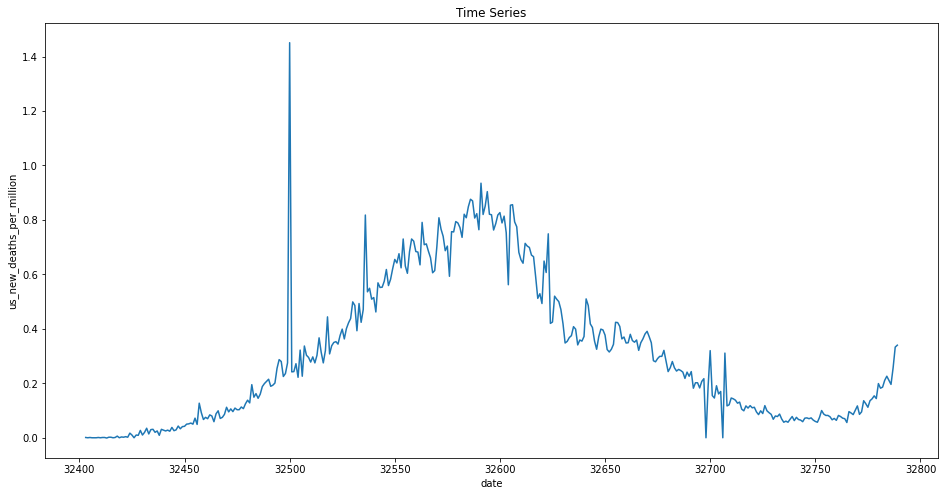

In [377]:
i_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_deaths_per_million")

China

In [378]:
country = "China"

include_c = train[train['location'].values == country]
exclude_c = train[train['location'].values != country]
c_cov19 = include_c
c_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
14933,CHN,Asia,China,2020-01-22,548.0,NaN,NaN,17.0,NaN,NaN,0.381,NaN,NaN,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.39,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,22012020
14934,CHN,Asia,China,2020-01-23,643.0,95.0,NaN,18.0,1.0,NaN,0.447,0.066,NaN,0.013,0.001,NaN,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,23012020
14935,CHN,Asia,China,2020-01-24,920.0,277.0,NaN,26.0,8.0,NaN,0.639,0.192,NaN,0.018,0.006,NaN,3.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,24012020
14936,CHN,Asia,China,2020-01-25,1406.0,486.0,NaN,42.0,16.0,NaN,0.977,0.338,NaN,0.029,0.011,NaN,3.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.69,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,25012020
14937,CHN,Asia,China,2020-01-26,2075.0,669.0,NaN,56.0,14.0,NaN,1.442,0.465,NaN,0.039,0.010,NaN,3.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,26012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15364,CHN,Asia,China,2021-03-28,101675.0,12.0,20.286,4841.0,0.0,0.286,70.641,0.008,0.014,3.363,0.000,0.0,0.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106613000.0,NaN,NaN,4196000.0,4129286.0,7.41,NaN,NaN,2869.0,56.94,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,28032021
15365,CHN,Asia,China,2021-03-29,101692.0,17.0,18.857,4841.0,0.0,0.286,70.653,0.012,0.013,3.363,0.000,0.0,0.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110962000.0,NaN,NaN,4349000.0,4357429.0,7.71,NaN,NaN,3027.0,50.00,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,29032021
15366,CHN,Asia,China,2021-03-30,101710.0,18.0,18.286,4841.0,0.0,0.143,70.665,0.013,0.013,3.363,0.000,0.0,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114690000.0,NaN,NaN,3728000.0,4549143.0,7.97,NaN,NaN,3161.0,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.3

Text(0, 0.5, 'china_new_cases_per_million')

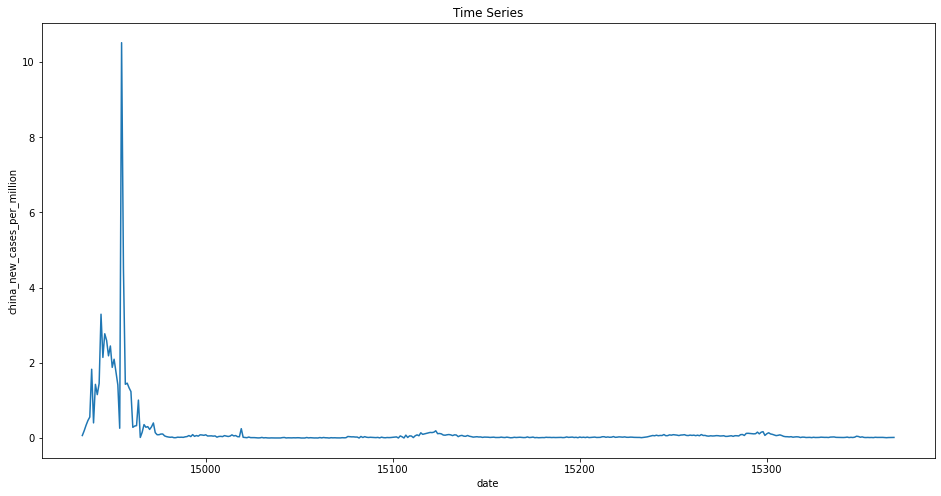

In [379]:
c_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("china_new_cases_per_million")

Text(0, 0.5, 'china_new_deaths_per_million')

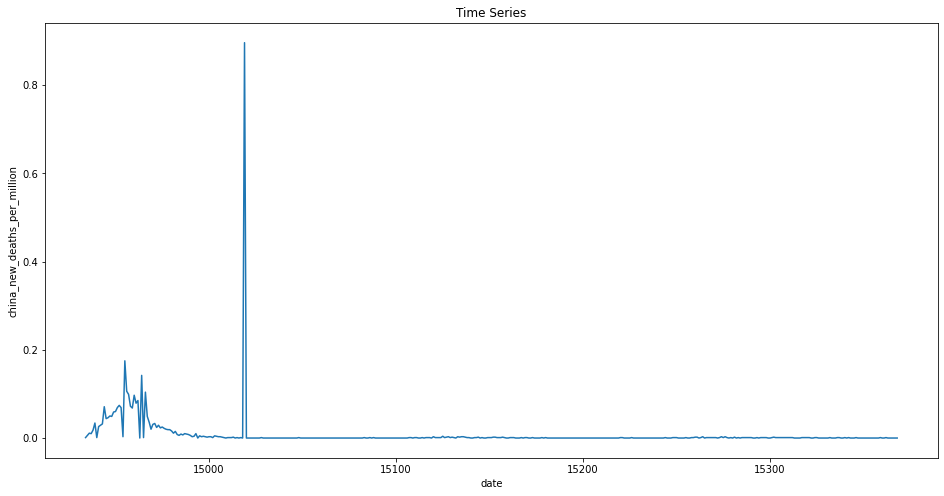

In [380]:
c_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("china_new_deaths_per_million")

Taiwan

In [381]:
country = "Taiwan"

include_t = train[train['location'].values == country]
exclude_t = train[train['location'].values != country]
t_cov19 = include_t
t_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
69514,TWN,Asia,Taiwan,2020-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,16012020
69515,TWN,Asia,Taiwan,2020-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,17012020
69516,TWN,Asia,Taiwan,2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,18012020
69517,TWN,Asia,Taiwan,2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,19012020
69518,TWN,Asia,Taiwan,2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,8.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,20012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69951,TWN,Asia,Taiwan,2021-03-28,1022.0,2.0,2.286,10.0,0.0,0.0,42.911,0.084,0.096,0.42,0.0,0.0,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.0,187770.0,7.884,0.007,510.0,0.021,0.004,223.1,people tested,9412.0,9412.0,NaN,35.0,1345.0,0.04,0.04,NaN,56.0,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,28032021
69952,TWN,Asia,Taiwan,2021-03-29,1023.0,1.0,2.429,10.0,0.0,0.0,42.953,0.042,0.102,0.42,0.0,0.0,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,851.0,188621.0,7.920,0.036,517.0,0.022,0.005,212.8,people tested,10891.0,10891.0,NaN,1479.0,1330.0,0.05,0.05,NaN,56.0,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,29032021
69953,TWN,Asia,Taiwan,2021-03-30,1024.0,1.0,2.429,10.0,0.0,0.0,42.995,0.042,0.102,0.42,0.0,0.0,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,836.0,189457.0,7.955,0.035,574.0,0.024,0.004,236.3,people tested,12648.0,12648.0,NaN,1757.0,1347.0,0.05,0.05,NaN,57.0,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,30032021
69954,TWN,Asia,Taiwan,2021-03-31,1030.0,6.0,3.000,10.0,0.0,0.0,43.247,0.252,0.126,0.42,0.0,0.0,NaN,NaN,NaN,N

Text(0, 0.5, 'taiwan_new_cases_per_million')

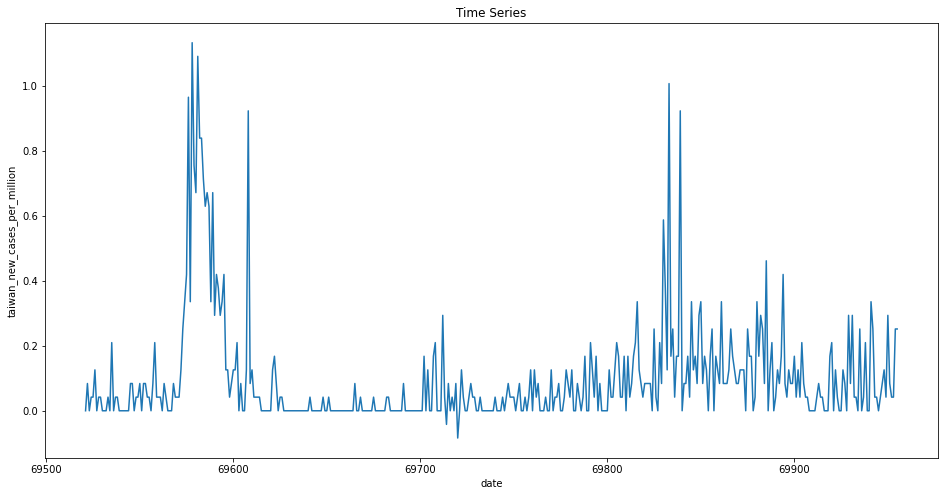

In [382]:
t_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("taiwan_new_cases_per_million")

Text(0, 0.5, 'taiwan_new_deaths_per_million')

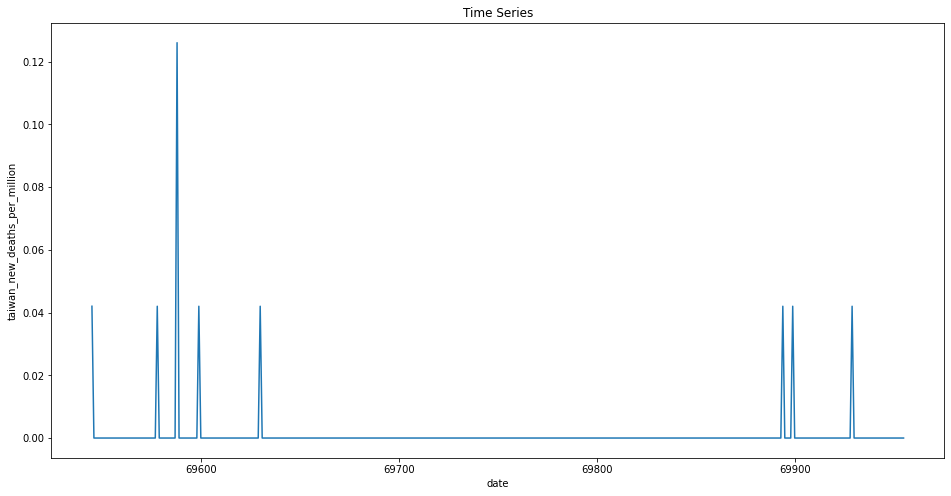

In [383]:
t_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("taiwan_new_deaths_per_million")

Japan

In [384]:
country = "Japan"

include_j = train[train['location'].values == country]
exclude_j = train[train['location'].values != country]
j_cov19 = include_j
j_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
36111,JPN,Asia,Japan,2020-01-22,2.0,NaN,NaN,NaN,NaN,NaN,0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,22012020
36112,JPN,Asia,Japan,2020-01-23,2.0,0.0,NaN,NaN,NaN,NaN,0.016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,23012020
36113,JPN,Asia,Japan,2020-01-24,2.0,0.0,NaN,NaN,NaN,NaN,0.016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,24012020
36114,JPN,Asia,Japan,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,25012020
36115,JPN,Asia,Japan,2020-01-26,4.0,2.0,NaN,NaN,NaN,NaN,0.032,0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,26012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36542,JPN,Asia,Japan,2021-03-28,468346.0,1783.0,1718.286,9050.0,29.0,32.714,3703.029,14.097,13.586,71.555,0.229,0.259,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18887.0,9104858.0,71.989,0.149,50368.0,0.398,0.034,29.3,people tested,NaN,NaN,NaN,NaN,34284.0,NaN,NaN,NaN,271.0,NaN,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,28032021
36543,JPN,Asia,Japan,2021-03-29,469636.0,1290.0,1790.286,9079.0,29.0,31.714,3713.229,10.200,14.155,71.784,0.229,0.251,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72179.0,9177037.0,72.559,0.571,53327.0,0.422,0.034,29.8,people tested,890662.0,825704.0,64958.0,NaN,33995.0,0.70,0.65,0.05,269.0,NaN,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,29032021
36544,JPN,Asia,Japan,2021-03-30,471777.0,2141.0,1879.429,9112.0,33.0,29.143,3730.157,16.928,14.860,72.045,0.261,0.230,1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41247.0,9218284.0,72.885,0.326,51688.0,0.409,0.036,27.5,people tested,949731.0,852946.0,96785.0,59069.0,35801.0,0.75,0.67,0.08,283.0,NaN,126476458.0,34

Text(0, 0.5, 'japan_new_cases_per_million')

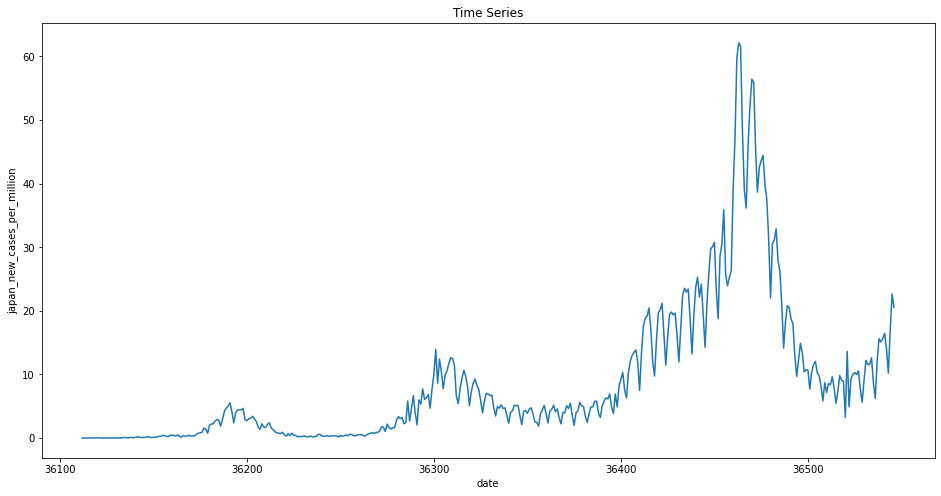

In [385]:
j_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("japan_new_cases_per_million")

Text(0, 0.5, 'japan_new_deaths_per_million')

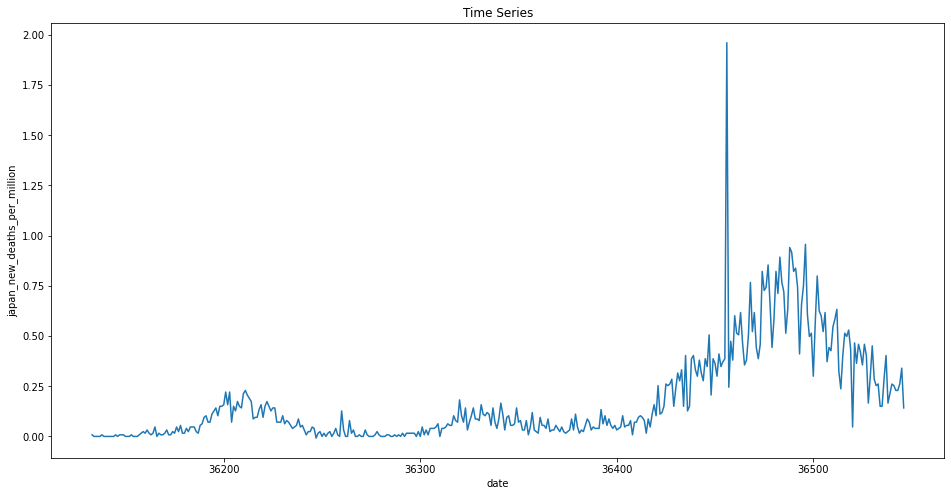

In [386]:
j_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("japan_new_deaths_per_million")

New Zealand

In [387]:
country = "New Zealand"

include_nz = train[train['location'].values == country]
exclude_nz = train[train['location'].values != country]
nz_cov19 = include_nz
nz_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
50275,NZL,Oceania,New Zealand,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,0.207,0.207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,28022020
50276,NZL,Oceania,New Zealand,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,29022020
50277,NZL,Oceania,New Zealand,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,0.047,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,01032020
50278,NZL,Oceania,New Zealand,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,254.0,0.053,0.006,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,02032020
50279,NZL,Oceania,New Zealand,2020-03-03,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,280.0,0.058,0.005,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50669,NZL,Oceania,New Zealand,2021-03-28,2493.0,11.0,4.429,26.0,0.0,0.0,516.980,2.281,0.918,5.392,0.0,0.0,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4322.0,1884329.0,390.759,0.896,5114.0,1.061,0.001,1154.7,tests performed,NaN,NaN,NaN,NaN,3105.0,NaN,NaN,NaN,644.0,22.22,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,28032021
50670,NZL,Oceania,New Zealand,2021-03-29,2495.0,2.0,4.714,26.0,0.0,0.0,517.395,0.415,0.978,5.392,0.0,0.0,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2750.0,1887079.0,391.329,0.570,4932.0,1.023,0.001,1046.2,tests performed,NaN,NaN,NaN,NaN,3364.0,NaN,NaN,NaN,698.0,22.22,4822233.0,18.206,37.9,15.322,9.72,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,29032021
50671,NZL,Oceania,New Zealand,2021-03-30,2497.0,2.0,3.857,26.0,0.0,0.0,517.810,0.415,0.800,5.392,0.0,0.0,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3730.0,1890809.0,392.102,0.774,5071.0,1.052,0.001,1314.8,tests performed,NaN,NaN,NaN,NaN,3622.0,NaN,NaN,NaN,751.0,NaN,48

Text(0, 0.5, 'new_zealand_new_cases_per_million')

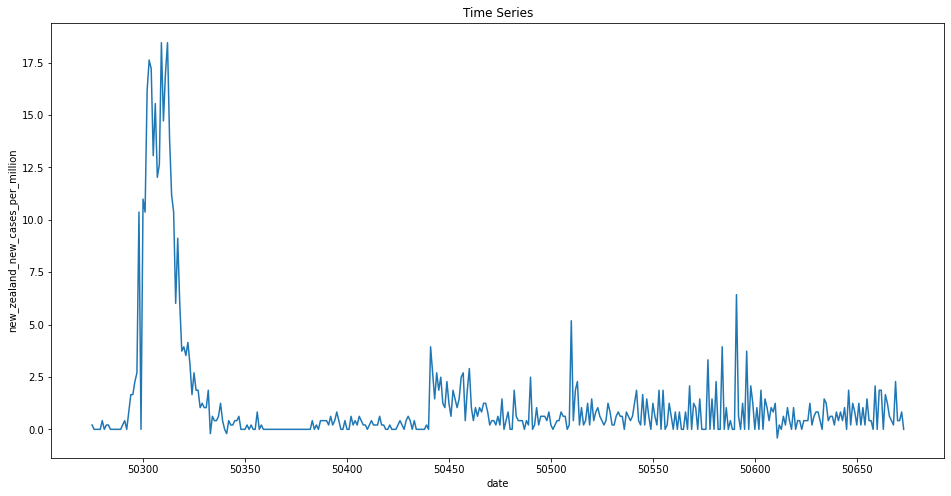

In [388]:
nz_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("new_zealand_new_cases_per_million")

Text(0, 0.5, 'new_zealand_new_deaths_per_million')

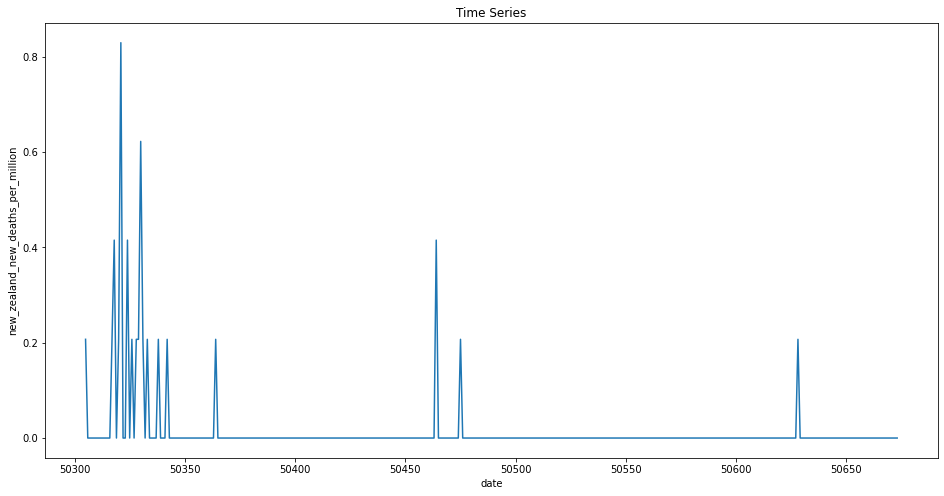

In [389]:
nz_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("new_zealand_new_deaths_per_million")

Australia

In [390]:
country = "Australia"

include_a = train[train['location'].values == country]
exclude_a = train[train['location'].values != country]
a_cov19 = include_a
a_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
4114,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,NaN,NaN,0.157,0.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,26012020
4115,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,NaN,NaN,0.196,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,27012020
4116,AUS,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,NaN,NaN,0.196,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,28012020
4117,AUS,Oceania,Australia,2020-01-29,6.0,1.0,NaN,NaN,NaN,NaN,0.235,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,29012020
4118,AUS,Oceania,Australia,2020-01-30,9.0,3.0,NaN,NaN,NaN,NaN,0.353,0.118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,30012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,AUS,Oceania,Australia,2021-03-28,29276.0,17.0,10.000,909.0,0.0,0.0,1148.084,0.667,0.392,35.647,0.0,0.0,1.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15438469.0,605.433,NaN,35820.0,1.405,0.0,3582.0,tests performed,511520.0,NaN,NaN,5055.0,36357.0,2.01,NaN,NaN,1426.0,NaN,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,28032021
4542,AUS,Oceania,Australia,2021-03-29,29296.0,20.0,12.143,909.0,0.0,0.0,1148.868,0.784,0.476,35.647,0.0,0.0,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45086.0,15483555.0,607.201,1.768,37896.0,1.486,0.0,3120.8,tests performed,541761.0,NaN,NaN,30241.0,37082.0,2.12,NaN,NaN,1454.0,NaN,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,29032021
4543,AUS,Oceania,Australia,2021-03-30,29304.0,8.0,11.857,909.0,0.0,0.0,1149.182,0.314,0.465,35.647,0.0,0.0,1.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44889.0,15528444.0,608.961,1.760,38788.0,1.521,0.0,3271.3,tests performed,597523.0,NaN,NaN,55762.0,41428.0,2.34,NaN,NaN,1625.0,NaN,25499881.0,3.202,37.9,15.504,

Text(0, 0.5, 'australia_new_cases_per_million')

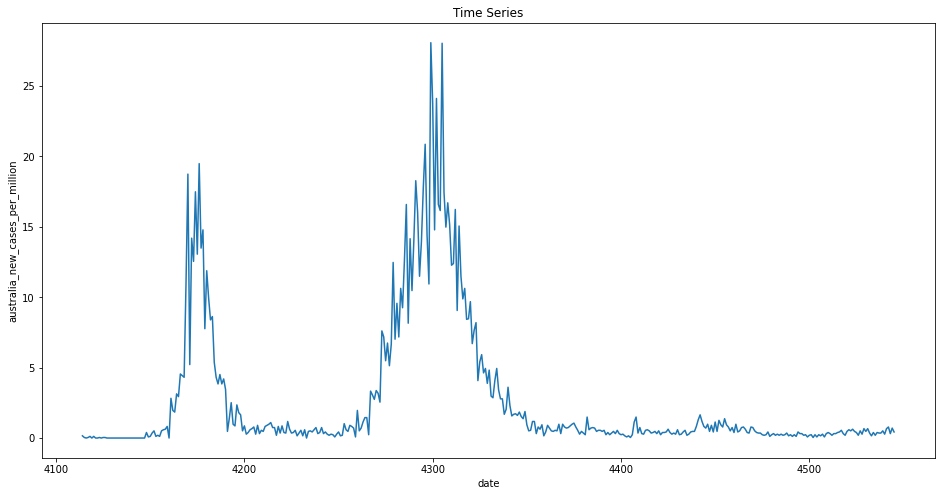

In [391]:
a_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("australia_new_cases_per_million")

Text(0, 0.5, 'australia_new_deaths_per_million')

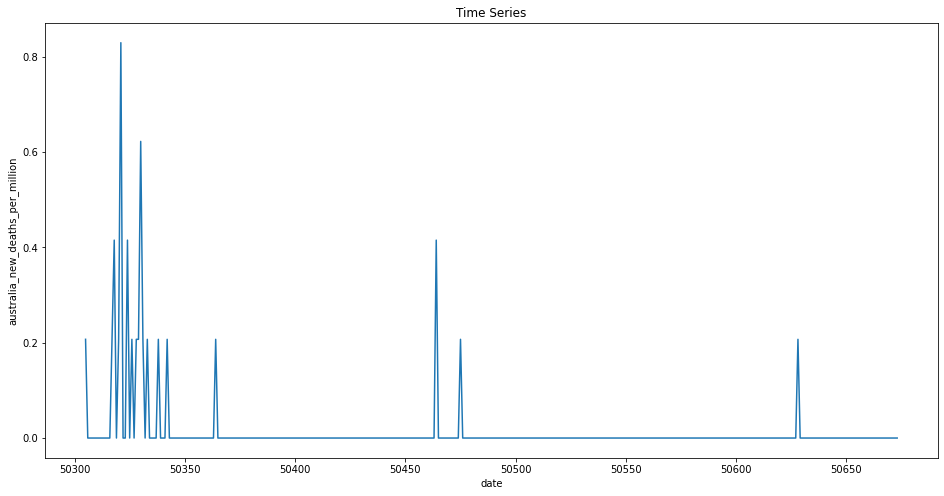

In [392]:
nz_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("australia_new_deaths_per_million")

South Africa

In [393]:
country = "South Africa"

include_sa = train[train['location'].values == country]
exclude_sa = train[train['location'].values != country]
sa_cov19 = include_sa
sa_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
65040,ZAF,Africa,South Africa,2020-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,07022020
65041,ZAF,Africa,South Africa,2020-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,08022020
65042,ZAF,Africa,South Africa,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,09022020
65043,ZAF,Africa,South Africa,2020-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,10022020
65044,ZAF,Africa,South Africa,2020-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,11022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65455,ZAF,Africa,South Africa,2021-03-28,1545431.0,965.0,1082.714,52663.0,15.0,78.857,26057.412,16.271,18.256,887.947,0.253,1.330,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24256.0,9803871.0,165.302,0.409,24083.0,0.406,0.045,22.2,people tested,NaN,NaN,NaN,NaN,6716.0,NaN,NaN,NaN,113.0,48.15,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,28032021
65456,ZAF,Africa,South Africa,2021-03-29,1545979.0,548.0,1075.429,52710.0,47.0,73.429,26066.652,9.240,18.133,888.740,0.792,1.238,0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239665.0,239665.0,239665.0,NaN,6890.0,0.40,0.40,0.40,116.0,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,29032021
65457,ZAF,Africa,South Africa,2021-03-30,1546735.0,756.0,1110.571,52788.0,78.0,76.714,26079.399,12.747,18.725,890.055,1.315,1.293,0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251707.0,251707.0,251707.0,12042.0,8

Text(0, 0.5, 'sa_new_cases_per_million')

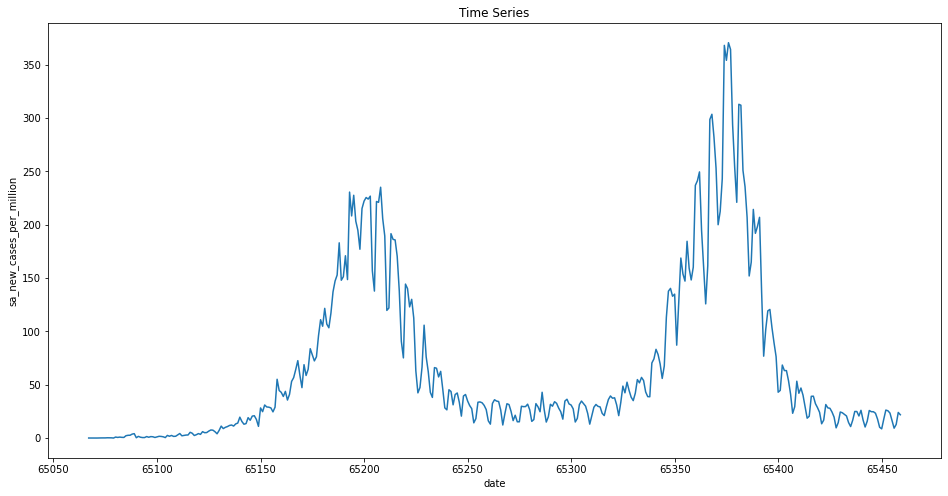

In [394]:
sa_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sa_new_cases_per_million")

Text(0, 0.5, 'sa_new_deaths_per_million')

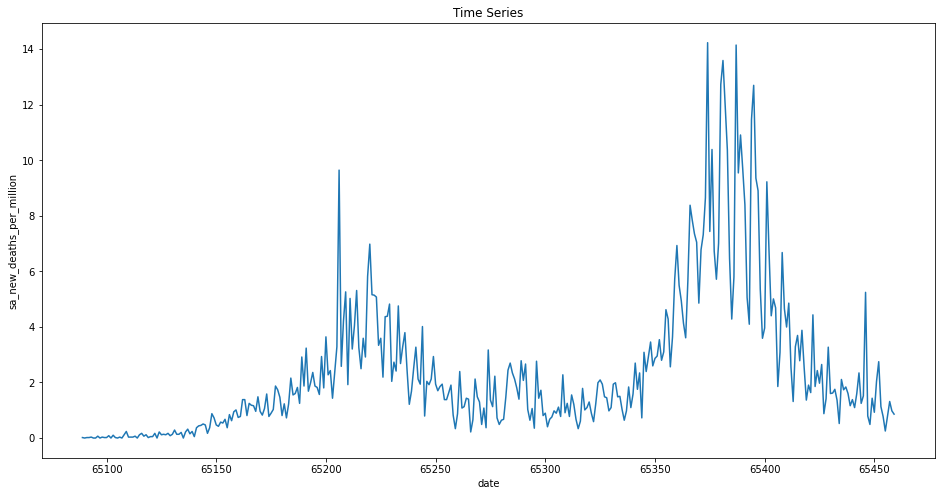

In [395]:
sa_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sa_new_deaths_per_million")

Nigeria

In [396]:
country = "Nigeria"

include_n = train[train['location'].values == country]
exclude_n = train[train['location'].values != country]
n_cov19 = include_n
n_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
51431,NGA,Africa,Nigeria,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,28022020
51432,NGA,Africa,Nigeria,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,29022020
51433,NGA,Africa,Nigeria,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,01032020
51434,NGA,Africa,Nigeria,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,02032020
51435,NGA,Africa,Nigeria,2020-03-03,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51825,NGA,Africa,Nigeria,2021-03-28,162593.0,104.0,122.286,2048.0,7.0,2.571,788.752,0.505,0.593,9.935,0.034,0.012,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5807.0,0.028,0.021,47.5,samples tested,513626.0,513626.0,NaN,NaN,46570.0,0.25,0.25,NaN,226.0,45.37,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,28032021
51826,NGA,Africa,Nigeria,2021-03-29,162641.0,48.0,110.429,2049.0,1.0,2.714,788.985,0.233,0.536,9.940,0.005,0.013,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1767694.0,8.575,NaN,5747.0,0.028,0.019,52.0,samples tested,NaN,NaN,NaN,NaN,52044.0,NaN,NaN,NaN,252.0,45.37,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.539,29032021
51827,NGA,Africa,Nigeria,2021-03-30,162762.0,121.0,98.000,2056.0,7.0,3.571,789.572,0.587,0.475,9.974,0.034,0.017,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57519.0,NaN,NaN,NaN,279.0,NaN,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.

Text(0, 0.5, 'n_new_cases_per_million')

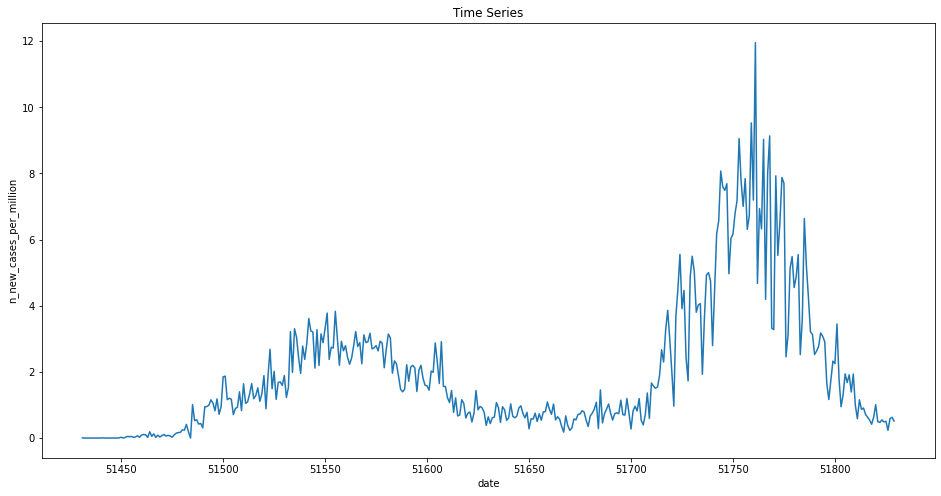

In [397]:
n_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("n_new_cases_per_million")

Text(0, 0.5, 'n_new_deaths_per_million')

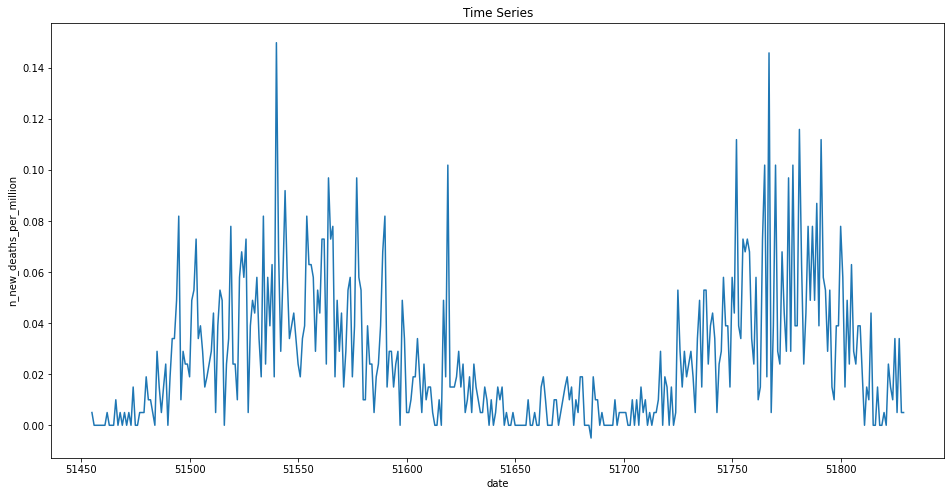

In [398]:
n_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("n_new_deaths_per_million")

Sweden

In [399]:
country = "Sweden"

include_s = train[train['location'].values == country]
exclude_s = train[train['location'].values != country]
s_cov19 = include_s
s_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
68291,SWE,Europe,Sweden,2020-02-01,1.0,1.0,NaN,NaN,NaN,NaN,0.099,0.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,01022020
68292,SWE,Europe,Sweden,2020-02-02,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,02022020
68293,SWE,Europe,Sweden,2020-02-03,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,03022020
68294,SWE,Europe,Sweden,2020-02-04,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,04022020
68295,SWE,Europe,Sweden,2020-02-05,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,05022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68712,SWE,Europe,Sweden,2021-03-28,780018.0,0.0,5106.571,13402.0,0.0,20.000,77235.087,0.000,505.638,1327.027,0.000,1.980,1.25,296.0,29.309,1707.0,169.022,147.662,14.621,NaN,NaN,48560.0,NaN,NaN,4.808,48560.0,4.808,0.105,9.5,tests performed,NaN,NaN,NaN,NaN,17867.0,NaN,NaN,NaN,1769.0,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,28032021
68713,SWE,Europe,Sweden,2021-03-29,780018.0,0.0,5106.571,13402.0,0.0,20.000,77235.087,0.000,505.638,1327.027,0.000,1.980,1.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20658.0,NaN,NaN,NaN,2045.0,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,29032021
68714,SWE,Europe,Sweden,2021-03-30,796445.0,16427.0,5444.286,13430.0,28.0,16.429,78861.640,1626.553,539.077,1329.799,2.772,1.627,1.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1588671.0,1106132.0,482539.0,NaN,23449.0,15.73,10.95,4.78,2322.0,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,

Text(0, 0.5, 'sweden_new_cases_per_million')

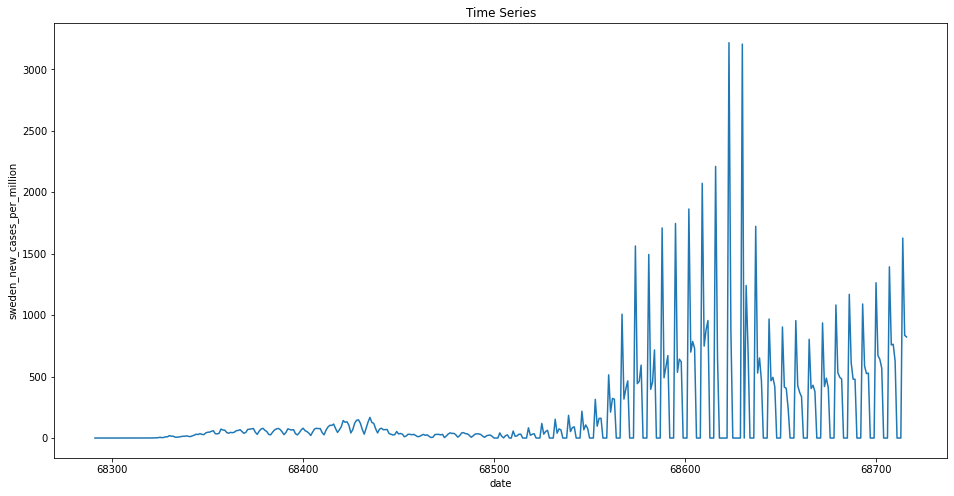

In [400]:
s_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sweden_new_cases_per_million")

Text(0, 0.5, 'sweden_new_deaths_per_million')

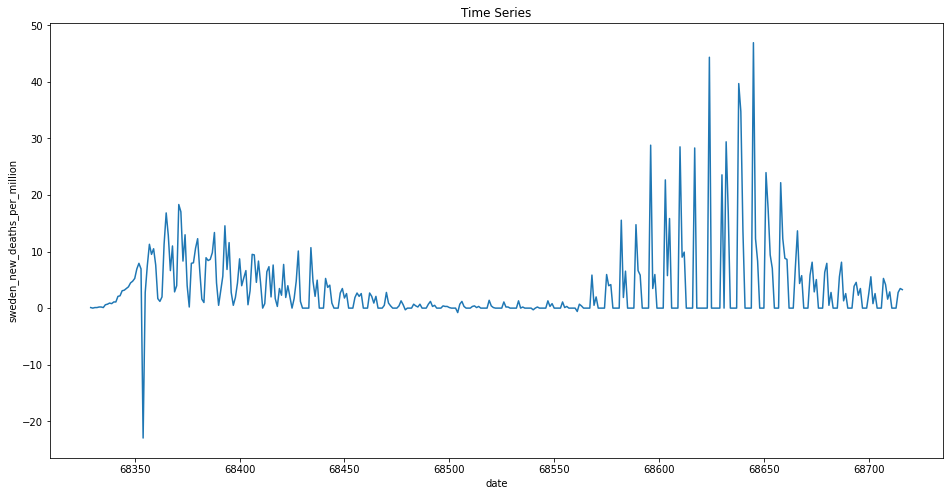

In [401]:
s_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sweden_new_deaths_per_million")

Denmark

In [402]:
country = "Denmark"

include_d = train[train['location'].values == country]
exclude_d = train[train['location'].values != country]
d_cov19 = include_d
d_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
19225,DNK,Europe,Denmark,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.000,0.000,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,02022020
19226,DNK,Europe,Denmark,2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,03022020
19227,DNK,Europe,Denmark,2020-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,04022020
19228,DNK,Europe,Denmark,2020-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,05022020
19229,DNK,Europe,Denmark,2020-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,06022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19645,DNK,Europe,Denmark,2021-03-28,228705.0,964.0,358.286,2415.0,1.0,2.000,39484.977,166.431,61.857,416.940,0.173,0.345,1.29,43.0,7.424,200.0,34.529,NaN,NaN,209.893,36.237,123447.0,21362329.0,3688.118,21.313,164709.0,28.436,0.002,459.7,tests performed,1059217.0,691500.0,367717.0,13585.0,15162.0,18.29,11.94,6.35,2618.0,NaN,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,28032021
19646,DNK,Europe,Denmark,2021-03-29,229384.0,679.0,273.571,2416.0,1.0,1.857,39602.203,117.227,47.231,417.112,0.173,0.321,1.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185706.0,21548035.0,3720.180,32.061,164413.0,28.385,0.002,601.0,tests performed,1083154.0,709394.0,373760.0,23937.0,16874.0,18.70,12.25,6.45,2913.0,NaN,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,29032021
19647,DNK,Europe,Denmark,2021-03-30,230594.0,1210.0,410.143,2418.0,2.0,2.000,39811.105,208.902,70.809,417.458,0.345,0.345,1.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1110824.0

Text(0, 0.5, 'denmark_new_cases_per_million')

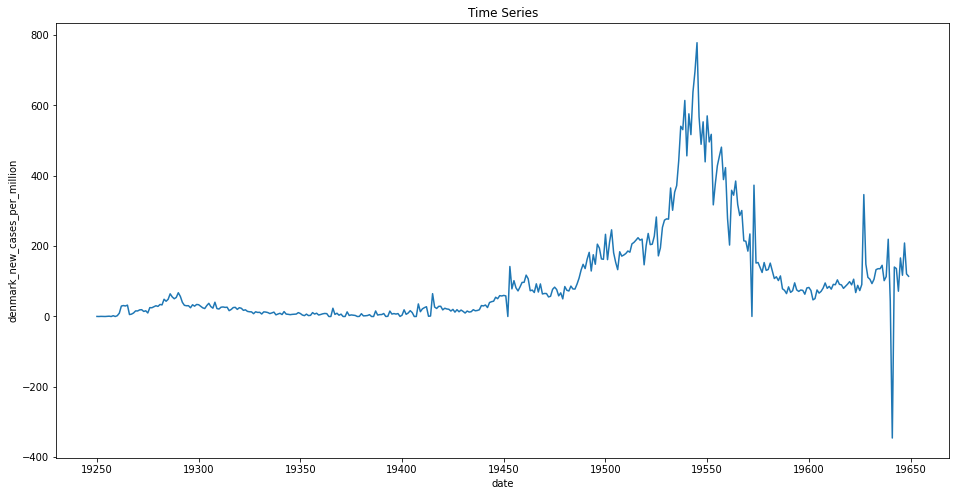

In [403]:
d_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("denmark_new_cases_per_million")

Text(0, 0.5, 'denmark_new_deaths_per_million')

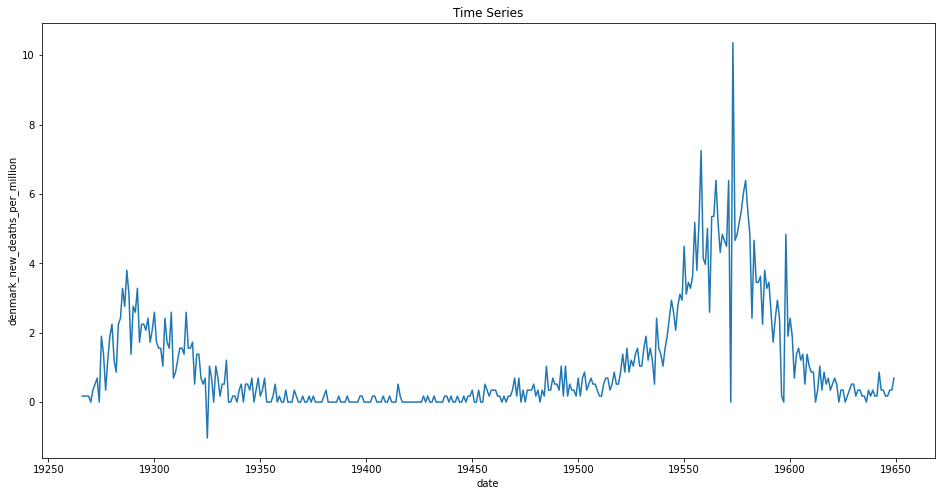

In [404]:
d_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("denmark_new_deaths_per_million")

Compare new cases per million to new deaths per million

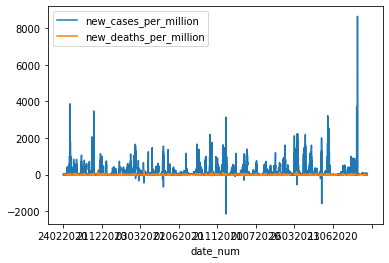

In [405]:
train.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

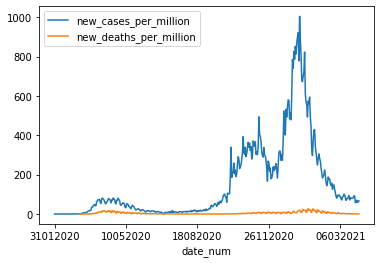

In [406]:
uk_cov19.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

Compare Countries

In [407]:
revised_uk_cov19 = uk_cov19[28:]
revised_uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
74364,GBR,Europe,United Kingdom,2020-02-28,56.0,12.0,4.714,NaN,NaN,0.000,0.825,0.177,0.069,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,28022020
74365,GBR,Europe,United Kingdom,2020-02-29,61.0,5.0,5.429,NaN,NaN,0.000,0.899,0.074,0.080,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,29022020
74366,GBR,Europe,United Kingdom,2020-03-01,94.0,33.0,9.429,NaN,NaN,0.000,1.385,0.486,0.139,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,01032020
74367,GBR,Europe,United Kingdom,2020-03-02,134.0,40.0,14.857,NaN,NaN,0.000,1.974,0.589,0.219,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,02032020
74368,GBR,Europe,United Kingdom,2020-03-03,189.0,55.0,22.143,NaN,NaN,0.000,2.784,0.810,0.326,NaN,NaN,0.000,2.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74758,GBR,Europe,United Kingdom,2021-03-28,4347013.0,3947.0,5259.714,126834.0,21.0,63.000,64034.009,58.142,77.479,1868.338,0.309,0.928,0.87,582.0,8.573,4170.0,61.427,NaN,NaN,2241.0,33.011,1641942.0,121071863.0,1783.458,24.187,1209889.0,17.822,0.004,230.0,tests performed,34119095.0,30444829.0,3674266.0,440327.0,548534.0,50.26,44.85,5.41,8080.0,75.93,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,28032021
74759,GBR,Europe,United Kingdom,2021-03-29,4351796.0,4783.0,5170.571,126857.0,23.0,63.714,64104.465,70.456,76.165,1868.677,0.339,0.939,0.87,583.0,8.588,4180.0,61.574,NaN,NaN,NaN,NaN,972317.0,122092382.0,1798.491,14.323,1165961.0,17.175,0.004,225.5,tests performed,34518958.0,30680948.0,3838010.0,399863.0,546772.0,50.85,45.19,5.65,8054.0,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,29032021
74760,GBR,Europe,United Kingdom,2021-03-30,4355867.0,407

In [408]:
revised_us_cov19 = us_cov19[37:]
revised_us_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
74800,USA,North America,United States,2020-02-28,17.0,0.0,0.143,NaN,NaN,0.000,0.051,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,28022020
74801,USA,North America,United States,2020-02-29,25.0,8.0,1.286,1.0,1.0,0.143,0.076,0.024,0.004,0.003,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,29022020
74802,USA,North America,United States,2020-03-01,32.0,7.0,2.286,1.0,0.0,0.143,0.097,0.021,0.007,0.003,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,368.0,368.0,0.001,0.001,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,01032020
74803,USA,North America,United States,2020-03-02,55.0,23.0,5.571,6.0,5.0,0.857,0.166,0.069,0.017,0.018,0.015,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,548.0,916.0,0.003,0.002,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,02032020
74804,USA,North America,United States,2020-03-03,74.0,19.0,8.286,7.0,1.0,1.000,0.224,0.057,0.025,0.021,0.003,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,930.0,1846.0,0.006,0.003,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75194,USA,North America,United States,2021-03-28,30263042.0,43694.0,63233.000,549420.0,507.0,970.571,91428.399,132.005,191.035,1659.866,1.532,2.932,1.10,NaN,NaN,NaN,NaN,NaN,NaN,30675.0,92.673,494171.0,374943029.0,1132.749,1.493,1135023.0,3.429,0.054,18.5,tests performed,143462691.0,93631163.0,51593564.0,3281956.0,2711611.0,42.90,28.00,15.43,8108.0,61.57,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,28032021
75195,USA,North America,United States,2021-03-29,30332461.0,69419.0,65782.286,550121.0,701.0,990.429,91638.122,209.723,198.736,1661.984,2.118,2.992,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,578493.0,375521522.0,1134.497,1.748,1086215.0,3.282,0.057,17.5,tests performed,145812835.0,95015762.0,52614231.0,2350144.0,2757586.0,43.60,28.41,15.73,8245.0,58.80,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,1

In [409]:
revised_fr_cov19 = fr_cov19[35:]
revised_fr_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
25794,FRA,Europe,France,2020-02-28,57.0,19.0,6.429,2.0,0.0,0.143,0.836,0.279,0.094,0.029,0.000,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,28022020
25795,FRA,Europe,France,2020-02-29,100.0,43.0,12.571,2.0,0.0,0.143,1.467,0.631,0.184,0.029,0.000,0.002,NaN,9.0,0.132,86.0,1.262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.72,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,29022020
25796,FRA,Europe,France,2020-03-01,130.0,30.0,16.857,2.0,0.0,0.143,1.908,0.440,0.247,0.029,0.000,0.002,3.01,9.0,0.132,116.0,1.702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.72,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,01032020
25797,FRA,Europe,France,2020-03-02,191.0,61.0,25.571,3.0,1.0,0.286,2.803,0.895,0.375,0.044,0.015,0.004,3.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.98,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,02032020
25798,FRA,Europe,France,2020-03-03,212.0,21.0,28.286,4.0,1.0,0.429,3.111,0.308,0.415,0.059,0.015,0.006,3.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.98,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26188,FRA,Europe,France,2021-03-28,4606185.0,37021.0,37584.000,94754.0,131.0,331.571,67591.216,543.247,551.508,1390.421,1.922,4.865,1.19,4872.0,71.492,27712.0,406.646,2742.298,40.241,12420.818,182.263,62617.0,NaN,NaN,0.919,464412.0,6.815,0.082,12.2,people tested,10453534.0,7798091.0,2655443.0,59291.0,260637.0,15.34,11.44,3.90,3825.0,NaN,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,28032021
26189,FRA,Europe,France,2021-03-29,4615295.0,9110.0,36626.429,95114.0,360.0,334.000,67724.896,133.680,537.457,1395.704,5.283,4.901,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685140.0,NaN,NaN,10.054,477823.0,7.012,0.082,12.2,people tested,10714250.0,8004958.0,2709292.0,260716.0,268510.0,15.72,11.75,3.98,3940.0,NaN,68147687.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,29032021
26190,FRA,Europe,France,2021-03-30,4646014.0,30719.0,38915.286,95495.0,381.0,347.286,68175.667,450.771,571.043,1401.2

In [410]:
revised_it_cov19 = it_cov19[28:]
revised_it_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
35325,ITA,Europe,Italy,2020-02-28,888.0,233.0,124.000,21.0,4.0,2.857,14.687,3.854,2.051,0.347,0.066,0.047,3.24,64.0,1.059,409.0,6.765,NaN,NaN,NaN,NaN,3681.0,15695.0,0.260,0.061,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,28022020
35326,ITA,Europe,Italy,2020-02-29,1128.0,240.0,152.286,29.0,8.0,3.857,18.656,3.969,2.519,0.480,0.132,0.064,3.12,105.0,1.737,506.0,8.369,NaN,NaN,NaN,NaN,2966.0,18661.0,0.309,0.049,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,29022020
35327,ITA,Europe,Italy,2020-03-01,1694.0,566.0,219.857,34.0,5.0,4.429,28.018,9.361,3.636,0.562,0.083,0.073,3.05,140.0,2.316,779.0,12.884,NaN,NaN,2275.879,37.642,2466.0,21127.0,0.349,0.041,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,01032020
35328,ITA,Europe,Italy,2020-03-02,2036.0,342.0,258.143,52.0,18.0,6.429,33.674,5.656,4.270,0.860,0.298,0.106,2.86,166.0,2.746,908.0,15.018,NaN,NaN,NaN,NaN,2218.0,23345.0,0.386,0.037,2717.0,0.045,0.095,10.5,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,02032020
35329,ITA,Europe,Italy,2020-03-03,2502.0,466.0,311.429,79.0,27.0,9.857,41.381,7.707,5.151,1.307,0.447,0.163,2.75,229.0,3.788,1263.0,20.889,NaN,NaN,NaN,NaN,2511.0,25856.0,0.428,0.042,2462.0,0.041,0.126,7.9,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35719,ITA,Europe,Italy,2021-03-28,3532057.0,19604.0,22240.143,107933.0,297.0,427.286,58417.966,324.238,367.838,1785.143,4.912,7.067,0.93,3679.0,60.848,32380.0,535.545,NaN,NaN,6727.275,111.265,272630.0,49093293.0,811.972,4.509,314627.0,5.204,0.071,14.1,tests performed,9474182.0,6491703.0,2982479.0,159426.0,223943.0,15.67,10.74,4.93,3704.0,NaN,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,28032021
35720,ITA,Europe,Italy,2021-03-29,3544957.0,12900.0,20582.857,108350.0,417.0,431.714,58631.324,213.358,340.427,1792.040,6.897,7.140,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156692.0,49249985.0,814.563,2.592,312841.0,5.174,0.066,15.2,tests performed,9709503.0,6661853.0,3047650.0,235321.0,230530.0,16.06,11.02,5.04,3813.0,NaN,60

In [411]:
revised_br_cov19 = br_cov19[2:]
revised_br_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
10104,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,28022020
10105,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,29022020
10106,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,01032020
10107,BRA,South America,Brazil,2020-03-02,2.0,0.0,0.286,NaN,NaN,0.000,0.009,0.000,0.001,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,02032020
10108,BRA,South America,Brazil,2020-03-03,2.0,0.0,0.286,NaN,NaN,0.000,0.009,0.000,0.001,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10498,BRA,South America,Brazil,2021-03-28,12534688.0,44326.0,76636.429,312206.0,1656.0,2594.857,58970.281,208.535,360.541,1468.794,7.791,12.208,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17706983.0,13659406.0,4047577.0,187900.0,592115.0,8.33,6.43,1.90,2786.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,28032021
10499,BRA,South America,Brazil,2021-03-29,12573615.0,38927.0,75155.571,313866.0,1660.0,2634.429,59153.415,183.135,353.574,1476.604,7.810,12.394,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18082153.0,13988029.0,4094124.0,375170.0,566513.0,8.51,6.58,1.93,2665.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,29032021
10500,BRA,South America,Brazil,2021-03-30,12658109.0,84494.0,75441.429,317646.0,3780.0,2710.000,59550.923,397.508,354.919,1494.387,17.783,12.749,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18222559.0,14112509.0,4110

In [412]:
revised_sp_cov19 = sp_cov19[27:]
revised_sp_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
66691,ESP,Europe,Spain,2020-02-28,32.0,17.0,4.286,NaN,NaN,0.000,0.684,0.364,0.092,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,28022020
66692,ESP,Europe,Spain,2020-02-29,45.0,13.0,6.143,NaN,NaN,0.000,0.962,0.278,0.131,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,29022020
66693,ESP,Europe,Spain,2020-03-01,84.0,39.0,11.714,NaN,NaN,0.000,1.797,0.834,0.251,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,186.693,3.993,1116.205,23.874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,01032020
66694,ESP,Europe,Spain,2020-03-02,120.0,36.0,16.857,NaN,NaN,0.000,2.567,0.770,0.361,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,02032020
66695,ESP,Europe,Spain,2020-03-03,165.0,45.0,22.714,1.0,1.0,0.143,3.529,0.962,0.486,0.021,0.021,0.003,3.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67085,ESP,Europe,Spain,2021-03-28,3255324.0,0.0,6141.714,75010.0,0.0,300.000,69625.476,0.000,131.360,1604.328,0.000,6.416,1.19,NaN,NaN,NaN,NaN,48.402,1.035,783.319,16.754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166235.0,NaN,NaN,NaN,3555.0,NaN,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,28032021
67086,ESP,Europe,Spain,2021-03-29,3270825.0,15501.0,6003.143,75199.0,189.0,236.571,69957.014,331.538,128.396,1608.370,4.042,5.060,1.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7571439.0,4967230.0,2604209.0,NaN,178504.0,16.19,10.62,5.57,3818.0,NaN,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,29032021
67087,ESP,Europe,Spain,2021-03-30,3275819.0,4994.0,5928.571,75305.0,106.0,223.000,70063.826,106.813,126.801,1610.637,2.267,4.770,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7736611.0,5092535.0,2644076.0,165172.0,189631.0,16.55,10.89,5.66

In [413]:
revised_p_cov19 = p_cov19[2:]
revised_p_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
57200,PRT,Europe,Portugal,2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.846,1.554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,15022020
57201,PRT,Europe,Portugal,2020-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.807,1.943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,23022020
57202,PRT,Europe,Portugal,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.721,2.817,NaN,25.0,0.002,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,01032020
57203,PRT,Europe,Portugal,2020-03-02,2.0,2.0,NaN,NaN,NaN,NaN,0.196,0.196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,70.0,0.007,0.004,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,02032020
57204,PRT,Europe,Portugal,2020-03-03,2.0,0.0,NaN,NaN,NaN,NaN,0.196,0.000,NaN,NaN,NaN,NaN,NaN,0.0,0.000,0.0,0.000,NaN,NaN,NaN,NaN,61.0,131.0,0.013,0.006,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57594,PRT,Europe,Portugal,2021-03-28,820407.0,365.0,411.000,16837.0,10.0,9.857,80458.034,35.796,40.307,1651.219,0.981,0.967,0.83,142.0,13.926,633.0,62.079,NaN,NaN,60.412,5.925,10845.0,9015124.0,884.121,1.064,25910.0,2.541,0.016,63.0,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.56,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,28032021
57595,PRT,Europe,Portugal,2021-03-29,820716.0,309.0,419.714,16843.0,6.0,8.429,80488.338,30.304,41.162,1651.808,0.588,0.827,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30104.0,9045228.0,887.073,2.952,25884.0,2.538,0.016,61.7,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.56,10196707.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864,29032021
57596,PRT,Europe,Portugal,2021-03-30,821104.0,388.0,413.143,16845.0,2.0,7.286,80526.390,38.052,40.517,1652.004,0.196,0.715,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29159.0,9074387.0,889.933,2.860,25592.0,2.510,0.

In [414]:
revised_c_cov19 = c_cov19[37:]
revised_c_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
14970,CHN,Asia,China,2020-02-28,78928.0,328.0,482.571,2790.0,44.0,78.857,54.837,0.228,0.335,1.938,0.031,0.055,0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,28022020
14971,CHN,Asia,China,2020-02-29,79356.0,428.0,336.429,2837.0,47.0,56.286,55.134,0.297,0.234,1.971,0.033,0.039,0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,29022020
14972,CHN,Asia,China,2020-03-01,79932.0,576.0,415.714,2872.0,35.0,61.000,55.534,0.400,0.289,1.995,0.024,0.042,0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,01032020
14973,CHN,Asia,China,2020-03-02,80136.0,204.0,413.571,2914.0,42.0,45.571,55.676,0.142,0.287,2.025,0.029,0.032,0.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,02032020
14974,CHN,Asia,China,2020-03-03,80261.0,125.0,358.143,2947.0,33.0,40.286,55.763,0.087,0.249,2.047,0.023,0.028,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15364,CHN,Asia,China,2021-03-28,101675.0,12.0,20.286,4841.0,0.0,0.286,70.641,0.008,0.014,3.363,0.000,0.000,0.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106613000.0,NaN,NaN,4196000.0,4129286.0,7.41,NaN,NaN,2869.0,56.94,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,28032021
15365,CHN,Asia,China,2021-03-29,101692.0,17.0,18.857,4841.0,0.0,0.286,70.653,0.012,0.013,3.363,0.000,0.000,0.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110962000.0,NaN,NaN,4349000.0,4357429.0,7.71,NaN,NaN,3027.0,50.00,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,29032021
15366,CHN,Asia,China,2021-03-30,101710.0,18.0,18.286,4841.0,0.0,0.143,70.665,0.013,0.013,3.363,0.000,0.000,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114690000.0,NaN,NaN,3728000.0,4549143.0,7.97,NaN,Na

In [415]:
revised_i_cov19 = i_cov19[29:]
revised_i_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
32391,IND,Asia,India,2020-02-28,3.0,0.0,0.000,NaN,NaN,0.000,0.002,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,28022020
32392,IND,Asia,India,2020-02-29,3.0,0.0,0.000,NaN,NaN,0.000,0.002,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,29022020
32393,IND,Asia,India,2020-03-01,3.0,0.0,0.000,NaN,NaN,0.000,0.002,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,01032020
32394,IND,Asia,India,2020-03-02,5.0,2.0,0.286,NaN,NaN,0.000,0.004,0.001,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,02032020
32395,IND,Asia,India,2020-03-03,5.0,0.0,0.286,NaN,NaN,0.000,0.004,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32785,IND,Asia,India,2021-03-28,12039644.0,68020.0,56223.286,161843.0,291.0,268.000,8724.352,49.290,40.741,117.277,0.211,0.194,1.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1181289.0,240950842.0,174.602,0.856,1073171.0,0.778,0.052,19.1,samples tested,60530435.0,51660234.0,8870201.0,260653.0,2209205.0,4.39,3.74,0.64,1601.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,28032021
32786,IND,Asia,India,2021-03-29,12095855.0,56211.0,58437.000,162114.0,271.0,278.286,8765.084,40.732,42.346,117.474,0.196,0.202,1.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,913319.0,241864161.0,175.263,0.662,1059770.0,0.768,0.055,18.1,samples tested,61113354.0,52211398.0,8901956.0,582919.0,1802680.0,4.43,3.78,0.65,1306.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,29032021
32787,IND,Asia,India,2021-03-30,12149335.0,53480.0,59325.286,162468.0,354.0,289.571,8803.838,38.754,42.989,117.730,0.257,0.210,1.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,785864.0,2

In [416]:
revised_t_cov19 = t_cov19[43:]
revised_t_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
69557,TWN,Asia,Taiwan,2020-02-28,34.0,2.0,1.143,1.0,0.0,0.0,1.428,0.084,0.048,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.0,10318.0,0.433,0.016,499.0,0.021,0.002,436.6,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,28022020
69558,TWN,Asia,Taiwan,2020-02-29,39.0,5.0,1.857,1.0,0.0,0.0,1.638,0.210,0.078,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,511.0,10829.0,0.455,0.021,508.0,0.021,0.004,273.6,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,29022020
69559,TWN,Asia,Taiwan,2020-03-01,40.0,1.0,1.714,1.0,0.0,0.0,1.679,0.042,0.072,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,11259.0,0.473,0.018,523.0,0.022,0.003,305.1,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,01032020
69560,TWN,Asia,Taiwan,2020-03-02,41.0,1.0,1.571,1.0,0.0,0.0,1.721,0.042,0.066,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,11859.0,0.498,0.025,509.0,0.021,0.003,324.0,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,02032020
69561,TWN,Asia,Taiwan,2020-03-03,42.0,1.0,1.571,1.0,0.0,0.0,1.763,0.042,0.066,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506.0,12365.0,0.519,0.021,494.0,0.021,0.003,314.4,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69951,TWN,Asia,Taiwan,2021-03-28,1022.0,2.0,2.286,10.0,0.0,0.0,42.911,0.084,0.096,0.420,0.0,0.0,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.0,187770.0,7.884,0.007,510.0,0.021,0.004,223.1,people tested,9412.0,9412.0,NaN,35.0,1345.0,0.04,0.04,NaN,56.0,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,28032021
69952,TWN,Asia,Taiwan,2021-03-29,1023.0,1.0,2.429,10.0,0.0,0.0,42.953,0.042,0.102,0.420,0.0,0.0,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,851.0,188621.0,7.920,0.036,517.0,0.022,0.005,212.8,people tested,10891.0,10891.0,NaN,1479.0,1330.0,0.05,0.05,NaN,56.0,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,29032021
69953,TWN,Asia,Taiwan,2021-03-30,1024.0,1.0,2.429,10.0,0.0,0.0,42.995,0.042,0.102,0.420,0.0,0.0,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,836.0,189457.0,7.955,0.035,574.0,0.024,0.004,236.3,people tested,12648.0,12648.0,NaN,1757.0,1347.0,0.05,0.05,NaN,57.0,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN

In [417]:
revised_j_cov19 = j_cov19[37:]
revised_j_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
36148,JPN,Asia,Japan,2020-02-28,236.0,18.0,17.714,5.0,1.0,0.429,1.866,0.142,0.140,0.040,0.008,0.003,1.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,1382.0,0.011,0.001,105.0,0.001,0.169,5.9,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.26,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,28022020
36149,JPN,Asia,Japan,2020-02-29,245.0,9.0,15.429,6.0,1.0,0.571,1.937,0.071,0.122,0.047,0.008,0.005,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.0,1560.0,0.012,0.001,116.0,0.001,0.133,7.5,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.26,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,29022020
36150,JPN,Asia,Japan,2020-03-01,259.0,14.0,15.714,6.0,0.0,0.571,2.048,0.111,0.124,0.047,0.000,0.005,1.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,1656.0,0.013,0.001,124.0,0.001,0.127,7.9,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.26,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,01032020
36151,JPN,Asia,Japan,2020-03-02,278.0,19.0,16.857,6.0,0.0,0.571,2.198,0.150,0.133,0.047,0.000,0.005,1.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,1727.0,0.014,0.001,120.0,0.001,0.140,7.1,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.52,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,02032020
36152,JPN,Asia,Japan,2020-03-03,298.0,20.0,17.857,6.0,0.0,0.429,2.356,0.158,0.141,0.047,0.000,0.003,1.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.0,1880.0,0.015,0.001,135.0,0.001,0.132,7.6,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.52,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36542,JPN,Asia,Japan,2021-03-28,468346.0,1783.0,1718.286,9050.0,29.0,32.714,3703.029,14.097,13.586,71.555,0.229,0.259,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18887.0,9104858.0,71.989,0.149,50368.0,0.398,0.034,29.3,people tested,NaN,NaN,NaN,NaN,34284.0,NaN,NaN,NaN,271.0,NaN,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,28032021
36543,JPN,Asia,Japan,2021-03-29,469636.0,1290.0,1790.286,9079.0,29.0,31.714,3713.229,10.200,14.155,71.784,0.229,0.251,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72179.0,9177037.0,72.559,0.571,53327.0,0.422,0.034,29.8,people tested,890662.0,825704.0,64958.0,NaN,33995.0,0.70,0.65,0.05,269.0,NaN,126476458.0,347.778,48.2,27.049,18.493,39002.223,NaN,79.37,5.72,11.2,33.7,NaN,13.05,84.63,0.919,29032021
36544,JPN,Asia,Japan,2021-03-30,471777.0,2141.0,1879.429,9112.0,33.0,29.143,3730.157,16.928,

In [418]:
revised_s_cov19 = s_cov19[27:]
revised_s_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
68318,SWE,Europe,Sweden,2020-02-28,11.0,8.0,1.429,NaN,NaN,0.000,1.089,0.792,0.141,NaN,NaN,0.000,NaN,0.0,0.000,1.0,0.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,28022020
68319,SWE,Europe,Sweden,2020-02-29,14.0,3.0,1.857,NaN,NaN,0.000,1.386,0.297,0.184,NaN,NaN,0.000,NaN,0.0,0.000,1.0,0.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,29022020
68320,SWE,Europe,Sweden,2020-03-01,14.0,0.0,1.857,NaN,NaN,0.000,1.386,0.000,0.184,NaN,NaN,0.000,NaN,0.0,0.000,1.0,0.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,01032020
68321,SWE,Europe,Sweden,2020-03-02,19.0,5.0,2.571,NaN,NaN,0.000,1.881,0.495,0.255,NaN,NaN,0.000,NaN,0.0,0.000,3.0,0.297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,02032020
68322,SWE,Europe,Sweden,2020-03-03,32.0,13.0,4.429,NaN,NaN,0.000,3.169,1.287,0.439,NaN,NaN,0.000,NaN,0.0,0.000,3.0,0.297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68712,SWE,Europe,Sweden,2021-03-28,780018.0,0.0,5106.571,13402.0,0.0,20.000,77235.087,0.000,505.638,1327.027,0.000,1.980,1.25,296.0,29.309,1707.0,169.022,147.662,14.621,NaN,NaN,48560.0,NaN,NaN,4.808,48560.0,4.808,0.105,9.5,tests performed,NaN,NaN,NaN,NaN,17867.0,NaN,NaN,NaN,1769.0,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,28032021
68713,SWE,Europe,Sweden,2021-03-29,780018.0,0.0,5106.571,13402.0,0.0,20.000,77235.087,0.000,505.638,1327.027,0.000,1.980,1.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20658.0,NaN,NaN,NaN,2045.0,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.945,29032021
68714,SWE,Europe,Sweden,2021-03-30,796445.0,16427.0,5444.286,13430.0,28.0,16.429,78861.640,1626.553,539.077,1329.799,2.772,1.627,1.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1588671.0,1106132.0,482539.0,NaN,23449.0,15.73,10.95,4.78,2322.0,NaN,100

In [419]:
revised_d_cov19 = d_cov19[26:]
revised_d_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
19251,DNK,Europe,Denmark,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.173,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,220.0,0.038,0.011,30.0,0.005,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,28022020
19252,DNK,Europe,Denmark,2020-02-29,3.0,2.0,NaN,NaN,NaN,NaN,0.518,0.345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,294.0,0.051,0.013,41.0,0.007,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,29022020
19253,DNK,Europe,Denmark,2020-03-01,4.0,1.0,NaN,NaN,NaN,NaN,0.691,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995,0.172,49.0,343.0,0.059,0.008,47.0,0.008,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,01032020
19254,DNK,Europe,Denmark,2020-03-02,4.0,0.0,NaN,NaN,NaN,NaN,0.691,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,423.0,0.073,0.014,58.0,0.010,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,02032020
19255,DNK,Europe,Denmark,2020-03-03,6.0,2.0,0.857,NaN,NaN,0.000,1.036,0.345,0.148,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,486.0,0.084,0.011,67.0,0.012,0.013,78.2,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.37,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19645,DNK,Europe,Denmark,2021-03-28,228705.0,964.0,358.286,2415.0,1.0,2.000,39484.977,166.431,61.857,416.940,0.173,0.345,1.29,43.0,7.424,200.0,34.529,NaN,NaN,209.893,36.237,123447.0,21362329.0,3688.118,21.313,164709.0,28.436,0.002,459.7,tests performed,1059217.0,691500.0,367717.0,13585.0,15162.0,18.29,11.94,6.35,2618.0,NaN,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,28032021
19646,DNK,Europe,Denmark,2021-03-29,229384.0,679.0,273.571,2416.0,1.0,1.857,39602.203,117.227,47.231,417.112,0.173,0.321,1.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185706.0,21548035.0,3720.180,32.061,164413.0,28.385,0.002,601.0,tests performed,1083154.0,709394.0,373760.0,23937.0,16874.0,18.70,12.25,6.45,2913.0,NaN,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,29032021
19647,DNK,Europe,Denmark,2021-03-30,230594.0,1210.0,410.143,2418.0,2.0,2.000,39811.105,208.902,70.809,417.458,0.3

In [420]:
revised_sa_cov19 = sa_cov19[21:]
revised_sa_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
65061,ZAF,Africa,South Africa,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,28022020
65062,ZAF,Africa,South Africa,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,29022020
65063,ZAF,Africa,South Africa,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,01032020
65064,ZAF,Africa,South Africa,2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,0.003,NaN,6.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,02032020
65065,ZAF,Africa,South Africa,2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,164.0,0.003,0.000,6.0,0.000,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65455,ZAF,Africa,South Africa,2021-03-28,1545431.0,965.0,1082.714,52663.0,15.0,78.857,26057.412,16.271,18.256,887.947,0.253,1.330,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24256.0,9803871.0,165.302,0.409,24083.0,0.406,0.045,22.2,people tested,NaN,NaN,NaN,NaN,6716.0,NaN,NaN,NaN,113.0,48.15,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,28032021
65456,ZAF,Africa,South Africa,2021-03-29,1545979.0,548.0,1075.429,52710.0,47.0,73.429,26066.652,9.240,18.133,888.740,0.792,1.238,0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239665.0,239665.0,239665.0,NaN,6890.0,0.40,0.40,0.40,116.0,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,29032021
65457,ZAF,Africa,South Africa,2021-03-30,1546735.0,756.0,1110.571,52788.0,78.0,76.714,26079.399,12.747,18.725,890.055,1.315,1.293,0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251707.0,251707.0,2517

In [421]:
revised_a_cov19 = a_cov19[33:]
revised_a_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
4147,AUS,Oceania,Australia,2020-02-28,15.0,0.0,0.000,NaN,NaN,0.000,0.588,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,28022020
4148,AUS,Oceania,Australia,2020-02-29,25.0,10.0,1.429,NaN,NaN,0.000,0.980,0.392,0.056,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,29022020
4149,AUS,Oceania,Australia,2020-03-01,27.0,2.0,1.714,1.0,1.0,0.143,1.059,0.078,0.067,0.039,0.039,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,01032020
4150,AUS,Oceania,Australia,2020-03-02,30.0,3.0,2.143,1.0,0.0,0.143,1.176,0.118,0.084,0.039,0.000,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,02032020
4151,AUS,Oceania,Australia,2020-03-03,39.0,9.0,3.429,1.0,0.0,0.143,1.529,0.353,0.134,0.039,0.000,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,AUS,Oceania,Australia,2021-03-28,29276.0,17.0,10.000,909.0,0.0,0.000,1148.084,0.667,0.392,35.647,0.000,0.000,1.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15438469.0,605.433,NaN,35820.0,1.405,0.0,3582.0,tests performed,511520.0,NaN,NaN,5055.0,36357.0,2.01,NaN,NaN,1426.0,NaN,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,28032021
4542,AUS,Oceania,Australia,2021-03-29,29296.0,20.0,12.143,909.0,0.0,0.000,1148.868,0.784,0.476,35.647,0.000,0.000,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45086.0,15483555.0,607.201,1.768,37896.0,1.486,0.0,3120.8,tests performed,541761.0,NaN,NaN,30241.0,37082.0,2.12,NaN,NaN,1454.0,NaN,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,29032021
4543,AUS,Oceania,Australia,2021-03-30,29304.0,8.0,11.857,909.0,0.0,0.000,1149.182,0.314,0.465,35.647,0.000,0.000,1.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44889.0,15528444.0,608.961,1.760,38788.0,1.521,0.0,3271.3,tests performed,597523.0,N

In [422]:
revised_uk_cov19.new_cases_per_million.shape, revised_us_cov19.new_cases_per_million.shape, revised_uk_cov19.new_deaths_per_million.shape, revised_us_cov19.new_deaths_per_million.shape

((399,), (399,), (399,), (399,))

In [423]:
date = revised_uk_cov19.date.values
uk_new_case_per_million = revised_uk_cov19.new_cases_per_million
uk_new_death_per_million = revised_uk_cov19.new_deaths_per_million

In [424]:
us_new_case_per_million = revised_us_cov19.new_cases_per_million
us_new_death_per_million = revised_us_cov19.new_deaths_per_million

In [425]:
date = revised_fr_cov19.date.values
fr_new_case_per_million = revised_fr_cov19.new_cases_per_million
fr_new_death_per_million = revised_fr_cov19.new_deaths_per_million

In [426]:
date = revised_it_cov19.date.values
it_new_case_per_million = revised_it_cov19.new_cases_per_million
it_new_death_per_million = revised_it_cov19.new_deaths_per_million

In [427]:
br_new_case_per_million = revised_br_cov19.new_cases_per_million
br_new_death_per_million = revised_br_cov19.new_deaths_per_million

In [428]:
p_new_case_per_million = revised_p_cov19.new_cases_per_million
p_new_death_per_million = revised_p_cov19.new_deaths_per_million

In [429]:
sp_new_case_per_million = revised_sp_cov19.new_cases_per_million
sp_new_death_per_million = revised_sp_cov19.new_deaths_per_million

In [430]:
c_new_case_per_million = revised_c_cov19.new_cases_per_million
c_new_death_per_million = revised_c_cov19.new_deaths_per_million

In [431]:
i_new_case_per_million = revised_i_cov19.new_cases_per_million
i_new_death_per_million = revised_i_cov19.new_deaths_per_million

In [432]:
t_new_case_per_million = revised_t_cov19.new_cases_per_million
t_new_death_per_million = revised_t_cov19.new_deaths_per_million

In [433]:
j_new_case_per_million = revised_j_cov19.new_cases_per_million
j_new_death_per_million = revised_j_cov19.new_deaths_per_million

In [434]:
sa_new_case_per_million = revised_sa_cov19.new_cases_per_million
sa_new_death_per_million = revised_sa_cov19.new_deaths_per_million

In [435]:
n_new_case_per_million = n_cov19.new_cases_per_million
n_new_death_per_million = n_cov19.new_deaths_per_million

In [436]:
nz_new_case_per_million = nz_cov19.new_cases_per_million
nz_new_death_per_million = nz_cov19.new_deaths_per_million

In [437]:
a_new_case_per_million = revised_a_cov19.new_cases_per_million
a_new_death_per_million = revised_a_cov19.new_deaths_per_million

In [438]:
s_new_case_per_million = revised_s_cov19.new_cases_per_million
s_new_death_per_million = revised_s_cov19.new_deaths_per_million

In [439]:
d_new_case_per_million = revised_d_cov19.new_cases_per_million
d_new_death_per_million = revised_d_cov19.new_deaths_per_million

In [440]:
uk_compare = pd.DataFrame({'date': date,'uk_new_cse_pr_million': uk_new_case_per_million, 'uk_new_dth_pr_million': uk_new_death_per_million})
uk_compare

,date,uk_new_cse_pr_million,uk_new_dth_pr_million
74364,2020-02-28,0.177,NaN
74365,2020-02-29,0.074,NaN
74366,2020-03-01,0.486,NaN
74367,2020-03-02,0.589,NaN
74368,2020-03-03,0.810,NaN
...,...,...,...
74758,2021-03-28,58.142,0.309
74759,2021-03-29,70.456,0.339
74760,2021-03-30,59.968,0.810
74761,2021-03-31,60.616,0.633


In [441]:
us_compare = pd.DataFrame({'date': date,'us_new_cse_pr_million': us_new_case_per_million, 'us_new_dth_pr_million': us_new_death_per_million})
us_compare

,date,us_new_cse_pr_million,us_new_dth_pr_million
74800,2020-02-28,0.000,NaN
74801,2020-02-29,0.024,0.003
74802,2020-03-01,0.021,0.000
74803,2020-03-02,0.069,0.015
74804,2020-03-03,0.057,0.003
...,...,...,...
75194,2021-03-28,132.005,1.532
75195,2021-03-29,209.723,2.118
75196,2021-03-30,185.014,2.643
75197,2021-03-31,202.503,3.251


In [442]:
fr_compare = pd.DataFrame({'date': date,'fr_new_cse_pr_million': fr_new_case_per_million, 'fr_new_dth_pr_million': fr_new_death_per_million})
fr_compare

,date,fr_new_cse_pr_million,fr_new_dth_pr_million
25794,2020-02-28,0.279,0.000
25795,2020-02-29,0.631,0.000
25796,2020-03-01,0.440,0.000
25797,2020-03-02,0.895,0.015
25798,2020-03-03,0.308,0.015
...,...,...,...
26188,2021-03-28,543.247,1.922
26189,2021-03-29,133.680,5.283
26190,2021-03-30,450.771,5.591
26191,2021-03-31,866.559,4.446


In [443]:
it_compare = pd.DataFrame({'date': date,'it_new_cse_pr_million': it_new_case_per_million, 'it_new_dth_pr_million': it_new_death_per_million})
it_compare

,date,it_new_cse_pr_million,it_new_dth_pr_million
35325,2020-02-28,3.854,0.066
35326,2020-02-29,3.969,0.132
35327,2020-03-01,9.361,0.083
35328,2020-03-02,5.656,0.298
35329,2020-03-03,7.707,0.447
...,...,...,...
35719,2021-03-28,324.238,4.912
35720,2021-03-29,213.358,6.897
35721,2021-03-30,265.539,8.749
35722,2021-03-31,395.076,7.724


In [444]:
br_compare = pd.DataFrame({'date': date,'br_new_cse_pr_million': br_new_case_per_million, 'br_new_dth_pr_million': br_new_death_per_million})
br_compare

,date,br_new_cse_pr_million,br_new_dth_pr_million
10104,2020-02-28,0.000,NaN
10105,2020-02-29,0.005,NaN
10106,2020-03-01,0.000,NaN
10107,2020-03-02,0.000,NaN
10108,2020-03-03,0.000,NaN
...,...,...,...
10498,2021-03-28,208.535,7.791
10499,2021-03-29,183.135,7.810
10500,2021-03-30,397.508,17.783
10501,2021-03-31,426.413,18.202


In [445]:
p_compare = pd.DataFrame({'date': date,'p_new_cse_pr_million': p_new_case_per_million, 'p_new_dth_pr_million': p_new_death_per_million})
p_compare

,date,p_new_cse_pr_million,p_new_dth_pr_million
57200,2020-02-28,NaN,NaN
57201,2020-02-29,NaN,NaN
57202,2020-03-01,NaN,NaN
57203,2020-03-02,0.196,NaN
57204,2020-03-03,0.000,NaN
...,...,...,...
57594,2021-03-28,35.796,0.981
57595,2021-03-29,30.304,0.588
57596,2021-03-30,38.052,0.196
57597,2021-03-31,60.608,0.294


In [446]:
sp_compare = pd.DataFrame({'date': date,'sp_new_cse_pr_million': sp_new_case_per_million, 'sp_new_dth_pr_million': sp_new_death_per_million})
sp_compare

,date,sp_new_cse_pr_million,sp_new_dth_pr_million
66691,2020-02-28,0.364,NaN
66692,2020-02-29,0.278,NaN
66693,2020-03-01,0.834,NaN
66694,2020-03-02,0.770,NaN
66695,2020-03-03,0.962,0.021
...,...,...,...
67085,2021-03-28,0.000,0.000
67086,2021-03-29,331.538,4.042
67087,2021-03-30,106.813,2.267
67088,2021-03-31,182.527,3.294


In [447]:
i_compare = pd.DataFrame({'date': date,'i_new_cse_pr_million': i_new_case_per_million, 'i_new_dth_pr_million': i_new_death_per_million})
i_compare

,date,i_new_cse_pr_million,i_new_dth_pr_million
32391,2020-02-28,0.000,NaN
32392,2020-02-29,0.000,NaN
32393,2020-03-01,0.000,NaN
32394,2020-03-02,0.001,NaN
32395,2020-03-03,0.000,NaN
...,...,...,...
32785,2021-03-28,49.290,0.211
32786,2021-03-29,40.732,0.196
32787,2021-03-30,38.754,0.257
32788,2021-03-31,52.413,0.333


In [448]:
c_compare = pd.DataFrame({'date': date,'c_new_cse_pr_million': c_new_case_per_million, 'c_new_dth_pr_million': c_new_death_per_million})
c_compare

,date,c_new_cse_pr_million,c_new_dth_pr_million
14970,2020-02-28,0.228,0.031
14971,2020-02-29,0.297,0.033
14972,2020-03-01,0.400,0.024
14973,2020-03-02,0.142,0.029
14974,2020-03-03,0.087,0.023
...,...,...,...
15364,2021-03-28,0.008,0.000
15365,2021-03-29,0.012,0.000
15366,2021-03-30,0.013,0.000
15367,2021-03-31,0.015,0.000


In [449]:
t_compare = pd.DataFrame({'date': date,'t_new_cse_pr_million': t_new_case_per_million, 't_new_dth_pr_million': t_new_death_per_million})
t_compare

,date,t_new_cse_pr_million,t_new_dth_pr_million
69557,2020-02-28,0.084,0.0
69558,2020-02-29,0.210,0.0
69559,2020-03-01,0.042,0.0
69560,2020-03-02,0.042,0.0
69561,2020-03-03,0.042,0.0
...,...,...,...
69951,2021-03-28,0.084,0.0
69952,2021-03-29,0.042,0.0
69953,2021-03-30,0.042,0.0
69954,2021-03-31,0.252,0.0


In [450]:
j_compare = pd.DataFrame({'date': date,'j_new_cse_pr_million': j_new_case_per_million, 'j_new_dth_pr_million': j_new_death_per_million})
j_compare

,date,j_new_cse_pr_million,j_new_dth_pr_million
36148,2020-02-28,0.142,0.008
36149,2020-02-29,0.071,0.008
36150,2020-03-01,0.111,0.000
36151,2020-03-02,0.150,0.000
36152,2020-03-03,0.158,0.000
...,...,...,...
36542,2021-03-28,14.097,0.229
36543,2021-03-29,10.200,0.229
36544,2021-03-30,16.928,0.261
36545,2021-03-31,22.645,0.340


In [451]:
sa_compare = pd.DataFrame({'date': date,'sa_new_cse_pr_million': sa_new_case_per_million, 'sa_new_dth_pr_million': sa_new_death_per_million})
sa_compare

,date,sa_new_cse_pr_million,sa_new_dth_pr_million
65061,2020-02-28,NaN,NaN
65062,2020-02-29,NaN,NaN
65063,2020-03-01,NaN,NaN
65064,2020-03-02,NaN,NaN
65065,2020-03-03,NaN,NaN
...,...,...,...
65455,2021-03-28,16.271,0.253
65456,2021-03-29,9.240,0.792
65457,2021-03-30,12.747,1.315
65458,2021-03-31,23.976,0.978


In [452]:
n_compare = pd.DataFrame({'date': date,'n_new_cse_pr_million': n_new_case_per_million, 'n_new_dth_pr_million': n_new_death_per_million})
n_compare

,date,n_new_cse_pr_million,n_new_dth_pr_million
51431,2020-02-28,0.005,NaN
51432,2020-02-29,0.000,NaN
51433,2020-03-01,0.000,NaN
51434,2020-03-02,0.000,NaN
51435,2020-03-03,0.000,NaN
...,...,...,...
51825,2021-03-28,0.505,0.034
51826,2021-03-29,0.233,0.005
51827,2021-03-30,0.587,0.034
51828,2021-03-31,0.626,0.005


In [453]:
nz_compare = pd.DataFrame({'date': date,'nz_new_cse_pr_million': nz_new_case_per_million, 'nz_new_dth_pr_million': nz_new_death_per_million})
nz_compare

,date,nz_new_cse_pr_million,nz_new_dth_pr_million
50275,2020-02-28,0.207,NaN
50276,2020-02-29,0.000,NaN
50277,2020-03-01,0.000,NaN
50278,2020-03-02,0.000,NaN
50279,2020-03-03,0.000,NaN
...,...,...,...
50669,2021-03-28,2.281,0.0
50670,2021-03-29,0.415,0.0
50671,2021-03-30,0.415,0.0
50672,2021-03-31,0.829,0.0


In [454]:
a_compare = pd.DataFrame({'date': date,'a_new_cse_pr_million': a_new_case_per_million, 'a_new_dth_pr_million': a_new_death_per_million})
a_compare

,date,a_new_cse_pr_million,a_new_dth_pr_million
4147,2020-02-28,0.000,NaN
4148,2020-02-29,0.392,NaN
4149,2020-03-01,0.078,0.039
4150,2020-03-02,0.118,0.000
4151,2020-03-03,0.353,0.000
...,...,...,...
4541,2021-03-28,0.667,0.000
4542,2021-03-29,0.784,0.000
4543,2021-03-30,0.314,0.000
4544,2021-03-31,0.706,0.000


In [455]:
s_compare = pd.DataFrame({'date': date,'s_new_cse_pr_million': s_new_case_per_million, 's_new_dth_pr_million': s_new_death_per_million})
s_compare

,date,s_new_cse_pr_million,s_new_dth_pr_million
68318,2020-02-28,0.792,NaN
68319,2020-02-29,0.297,NaN
68320,2020-03-01,0.000,NaN
68321,2020-03-02,0.495,NaN
68322,2020-03-03,1.287,NaN
...,...,...,...
68712,2021-03-28,0.000,0.000
68713,2021-03-29,0.000,0.000
68714,2021-03-30,1626.553,2.772
68715,2021-03-31,835.803,3.466


In [456]:
d_compare = pd.DataFrame({'date': date,'d_new_cse_pr_million': d_new_case_per_million, 'd_new_dth_pr_million': d_new_death_per_million})
d_compare

,date,d_new_cse_pr_million,d_new_dth_pr_million
19251,2020-02-28,0.000,NaN
19252,2020-02-29,0.345,NaN
19253,2020-03-01,0.173,NaN
19254,2020-03-02,0.000,NaN
19255,2020-03-03,0.345,NaN
...,...,...,...
19645,2021-03-28,166.431,0.173
19646,2021-03-29,117.227,0.173
19647,2021-03-30,208.902,0.345
19648,2021-03-31,121.025,0.345


In [457]:
compare = pd.merge(uk_compare, us_compare, on="date").merge(c_compare, on="date").merge(sa_compare, on="date") \
.merge(s_compare, on="date").merge(t_compare, on='date').merge(d_compare, on='date').merge(n_compare, on="date") \
.merge(j_compare, on='date').merge(i_compare, on='date').merge(nz_compare, on='date').merge(a_compare, on="date") \
.merge(sp_compare, on='date').merge(br_compare,on='date').merge(p_compare, on='date').merge(it_compare, on="date") \
.merge(fr_compare, on='date')
compare

,date,uk_new_cse_pr_million,uk_new_dth_pr_million,us_new_cse_pr_million,us_new_dth_pr_million,c_new_cse_pr_million,c_new_dth_pr_million,sa_new_cse_pr_million,sa_new_dth_pr_million,s_new_cse_pr_million,s_new_dth_pr_million,t_new_cse_pr_million,t_new_dth_pr_million,d_new_cse_pr_million,d_new_dth_pr_million,n_new_cse_pr_million,n_new_dth_pr_million,j_new_cse_pr_million,j_new_dth_pr_million,i_new_cse_pr_million,i_new_dth_pr_million,nz_new_cse_pr_million,nz_new_dth_pr_million,a_new_cse_pr_million,a_new_dth_pr_million,sp_new_cse_pr_million,sp_new_dth_pr_million,br_new_cse_pr_million,br_new_dth_pr_million,p_new_cse_pr_million,p_new_dth_pr_million,it_new_cse_pr_million,it_new_dth_pr_million,fr_new_cse_pr_million,fr_new_dth_pr_million
0,2020-02-28,0.177,NaN,0.000,NaN,0.228,0.031,NaN,NaN,0.792,NaN,0.084,0.0,0.000,NaN,0.005,NaN,0.142,0.008,0.000,NaN,0.207,NaN,0.000,NaN,0.364,NaN,0.000,NaN,NaN,NaN,3.854,0.066,0.279,0.000
1,2020-02-29,0.074,NaN,0.024,0.003,0.297,0.033,NaN,NaN,0.297,NaN,0.210,0.0,0.345,NaN,0.000,NaN,0.071,0.008,0.000,NaN,0.000,NaN,0.392,NaN,0.278,NaN,0.005,NaN,NaN,NaN,3.969,0.132,0.631,0.000
2,2020-03-01,0.486,NaN,0.021,0.000,0.400,0.024,NaN,NaN,0.000,NaN,0.042,0.0,0.173,NaN,0.000,NaN,0.111,0.000,0.000,NaN,0.000,NaN,0.078,0.039,0.834,NaN,0.000,NaN,NaN,NaN,9.361,0.083,0.440,0.000
3,2020-03-02,0.589,NaN,0.069,0.015,0.142,0.029,NaN,NaN,0.495,NaN,0.042,0.0,0.000,NaN,0.000,NaN,0.150,0.000,0.001,NaN,0.000,NaN,0.118,0.000,0.770,NaN,0.000,NaN,0.196,NaN,5.656,0.298,0.895,0.015
4,2020-03-03,0.810,NaN,0.057,0.003,0.087,0.023,NaN,NaN,1.287,NaN,0.042,0.0,0.345,NaN,0.000,NaN,0.158,0.000,0.000,NaN,0.000,NaN,0.353,0.000,0.962,0.021,0.000,NaN,0.000,NaN,7.707,0.447,0.308,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2021-03-28,58.142,0.309,132.005,1.532,0.008,0.000,16.271,0.253,0.000,0.000,0.084,0.0,166.431,0.173,0.505,0.034,14.097,0.229,49.290,0.211,2.281,0.0,0.667,0.000,0.000,0.000,208.535,7.791,35.796,0.981,324.238,4.912,543.247,1.922
395,2021-03-29,70.456,0.339,209.723,2.118,0.012,0.000,9.240,0.792,0.000,0.000,0.042,0.0,117.227,0.173,0.233,0.005,10.200,0.229,40.732,0.196,0.415,0.0,0.784,0.000,331.538,4.042,183.135,7.810,30.304,0.588,213.358,6.897,133.680,5.283
396,2021-03-30,59.968,0.810,185.014,2.643,0.013,0.000,12.747,1.315,1626.553,2.772,0.042,0.0,208.902,0.345,0.587,0.034,16.928,0.261,38.754,0.257,0.415,0.0,0.314,0.000,106.813,2.267,397.508,17.783,38.052,0.196,265.539,8.749,450.771,5.591
397,2021-03-31,60.616,0.633,202.503,3.251,0.015,0.000,23.976,0.978,835.803,3.466,0.252,0.0,121.025,0.345,0.626,0.005,22.645,0.340,52.413,0.333,0.829,0.0,0.706,0.000,182.527,3.294,426.413,18.202,60.608,0.294,395.076,7.724,866.559,4.446


In [458]:
compare.isnull().sum()

date                      0
uk_new_cse_pr_million     0
uk_new_dth_pr_million     7
us_new_cse_pr_million     0
us_new_dth_pr_million     1
c_new_cse_pr_million      0
c_new_dth_pr_million      0
sa_new_cse_pr_million     6
sa_new_dth_pr_million    28
s_new_cse_pr_million      0
s_new_dth_pr_million     11
t_new_cse_pr_million      0
t_new_dth_pr_million      0
d_new_cse_pr_million      0
d_new_dth_pr_million     15
n_new_cse_pr_million      0
n_new_dth_pr_million     24
j_new_cse_pr_million      0
j_new_dth_pr_million      0
i_new_cse_pr_million      0
i_new_dth_pr_million     12
nz_new_cse_pr_million     0
nz_new_dth_pr_million    30
a_new_cse_pr_million      0
a_new_dth_pr_million      2
sp_new_cse_pr_million     0
sp_new_dth_pr_million     4
br_new_cse_pr_million     0
br_new_dth_pr_million    18
p_new_cse_pr_million      3
p_new_dth_pr_million     18
it_new_cse_pr_million     0
it_new_dth_pr_million     0
fr_new_cse_pr_million     0
fr_new_dth_pr_million     0
dtype: int64

In [459]:
compare.fillna(0,inplace=True)

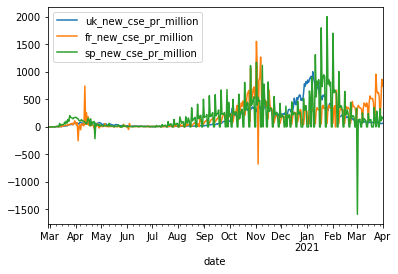

In [460]:
compare.plot(x="date", y=["uk_new_cse_pr_million", "fr_new_cse_pr_million","sp_new_cse_pr_million" ])

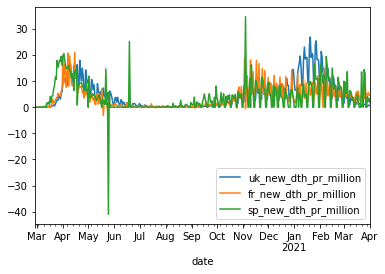

In [461]:
compare.plot(x="date", y=["uk_new_dth_pr_million", "fr_new_dth_pr_million", "sp_new_dth_pr_million" ])

Check for null values

In [462]:
train.isnull().sum()

iso_code                                     0
continent                                 3850
location                                     0
date                                         0
total_cases                               1571
new_cases                                 1573
new_cases_smoothed                        2574
total_deaths                             10980
new_deaths                               10822
new_deaths_smoothed                       2574
total_cases_per_million                   1991
new_cases_per_million                     1993
new_cases_smoothed_per_million            2989
total_deaths_per_million                 11387
new_deaths_per_million                   11229
new_deaths_smoothed_per_million           2989
reproduction_rate                        15390
icu_patients                             70569
icu_patients_per_million                 70569
hosp_patients                            68928
hosp_patients_per_million                68928
weekly_icu_ad

Impute missing values

In [463]:
train = train.drop(['date'], axis=1)

In [464]:
train.dtypes[train.dtypes != 'int64'][train.dtypes != 'float64']

iso_code       object
continent      object
location       object
tests_units    object
date_num       object
dtype: object

Impute null values in categorical columns

In [465]:
train['iso_code'] = train['iso_code'].fillna('Not Listed')
train['continent'] = train['continent'].fillna('Not Listed')
train['location'] = train['location'].fillna('Not Listed')
train['tests_units'] = train['tests_units'].fillna('Not Listed')

Impute numeric columns with 0

In [466]:
train.fillna(0,inplace=True)

Ordinal encoder

In [467]:
#ordinal encoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

train.iso_code = enc.fit_transform(train.iso_code.values.reshape(-1,1))
train.continent = enc.fit_transform(train.continent.values.reshape(-1,1))
train.location = enc.fit_transform(train.location.values.reshape(-1,1))
train.tests_units = enc.fit_transform(train.tests_units.values.reshape(-1,1))

Define X and y

In [468]:
iso_code = train.iso_code

y = train[['new_deaths']]
X = train.drop(['iso_code', 'new_deaths', 'total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
                 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
                 'new_deaths_smoothed_per_million'], axis=1)

Standard Scaler

In [469]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [470]:
y

,new_deaths
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
78867,1.0
78868,0.0
78869,0.0
78870,3.0


In [471]:
X

array([[-0.4706751 , -1.7082936 , -0.16012564, ..., -0.26169399,
        -0.62093644,  0.91600776],
       [-0.4706751 , -1.7082936 , -0.1601562 , ..., -0.26169399,
        -0.62093644,  1.02937781],
       [-0.4706751 , -1.7082936 , -0.1601562 , ..., -0.26169399,
        -0.62093644,  1.14274786],
       ...,
       [-1.06765324,  1.69998302, -0.1601562 , ..., -0.45087911,
        -0.37981062,  1.59736187],
       [-1.06765324,  1.69998302, -0.1588421 , ..., -0.45087911,
        -0.37981062,  1.71073192],
       [-1.06765324,  1.69998302, -0.15972835, ..., -0.45087911,
        -0.37981062, -1.68923588]])

Split training file up for training and validation

In [472]:
#split train set for testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((70984, 47), (7888, 47), (70984, 1), (7888, 1))

Select model

In [473]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(max_iter=2000, random_state=1).fit(X_train, y_train)
print(model.score(X_train, y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9904356566171223


Predict on validation set

In [474]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
y_pred[y_pred < 0] = 0
print(model.score(X_val, y_val)), print(r2_score(y_pred, model.predict(X_val)))

0.9394206754162477
0.9998233482743979


(None, None)

In [475]:
y_val

,new_deaths
42150,0.0
69328,2.0
57989,3.0
31074,0.0
3668,24.0
...,...
67740,0.0
70677,0.0
7153,5.0
56547,58.0


In [476]:
y_train.values

array([[3.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       ...,
       [3.0000e+00],
       [1.2000e+01],
       [1.2459e+04]])

In [477]:
y_pred

array([  0,   1,   0, ...,   0,  43, 116])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


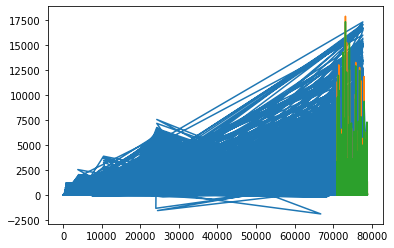

In [478]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train.values] + [x for x in y_val.values])
pyplot.plot([None for i in y_train.values] + [x for x in y_pred.astype(int)])
pyplot.show()

Put predictions in dataframe

In [479]:
df_val=pd.DataFrame({'actual_deaths': y_val.values.ravel(), 'predicted_deaths':y_pred.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

,actual_deaths,predicted_deaths
0,0.0,0
1,2.0,1
2,3.0,0
3,0.0,2
4,24.0,6
...,...,...
7883,0.0,2
7884,0.0,0
7885,5.0,0
7886,58.0,43


Create test dataset

In [480]:
test = last_date.copy()
test.date = today
test

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
402,AFG,Asia,Afghanistan,2021-04-02,56517.0,63.0,41.571,2489.0,5.0,3.143,1451.821,1.618,1.068,63.938,0.128,0.081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,01042021
816,OWID_AFR,NaN,Africa,2021-04-02,4239457.0,22144.0,13054.857,113166.0,407.0,281.857,3162.362,16.518,9.738,84.415,0.304,0.210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11424210.0,7465743.0,4094775.0,249639.0,258138.0,0.85,0.56,0.31,193.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01042021
1218,ALB,Europe,Albania,2021-04-02,125506.0,349.0,391.286,2241.0,6.0,8.143,43611.787,121.273,135.967,778.720,2.085,2.830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2899.0,539484.0,187.464,1.007,2798.0,0.972,0.140,7.2,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,01042021
1620,DZA,Africa,Algeria,2021-04-02,117304.0,112.0,108.714,3096.0,3.0,3.571,2675.056,2.554,2.479,70.603,0.068,0.081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,01042021
2016,AND,Europe,Andorra,2021-04-02,12053.0,43.0,52.286,115.0,0.0,0.143,155995.600,556.526,676.706,1488.384,0.000,1.849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,01042021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77320,VNM,Asia,Vietnam,2021-04-02,2617.0,14.0,5.429,35.0,0.0,0.000,26.886,0.144,0.056,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704,01042021
77756,OWID_WRL,NaN,World,2021-04-02,129607542.0,711621.0,588166.857,2827520.0,11861.0,10296.714,16627.439,91.294,75.456,362.744,1.522,1.321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,617027408.0,345380949.0,135064161.0,18926433.0,15465187.0,7.92,4.43,1.73,1984.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,01042021
78113,YEM,Asia,Yemen,2021-04-02,4531.0,174.0,102.143,906.0,18.0,13.714,151.915,5.834,3.425,30.376,0.604,0.460,NaN,NaN,NaN,Na

Convert date to number

In [481]:
import datetime 

test['date'] = pd.to_datetime(test['date'], errors='coerce')

test['date_num'] = test['date'].dt.strftime('%d%m%Y')
test

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
402,AFG,Asia,Afghanistan,2021-04-02,56517.0,63.0,41.571,2489.0,5.0,3.143,1451.821,1.618,1.068,63.938,0.128,0.081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,02042021
816,OWID_AFR,NaN,Africa,2021-04-02,4239457.0,22144.0,13054.857,113166.0,407.0,281.857,3162.362,16.518,9.738,84.415,0.304,0.210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11424210.0,7465743.0,4094775.0,249639.0,258138.0,0.85,0.56,0.31,193.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02042021
1218,ALB,Europe,Albania,2021-04-02,125506.0,349.0,391.286,2241.0,6.0,8.143,43611.787,121.273,135.967,778.720,2.085,2.830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2899.0,539484.0,187.464,1.007,2798.0,0.972,0.140,7.2,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,02042021
1620,DZA,Africa,Algeria,2021-04-02,117304.0,112.0,108.714,3096.0,3.0,3.571,2675.056,2.554,2.479,70.603,0.068,0.081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,02042021
2016,AND,Europe,Andorra,2021-04-02,12053.0,43.0,52.286,115.0,0.0,0.143,155995.600,556.526,676.706,1488.384,0.000,1.849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,02042021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77320,VNM,Asia,Vietnam,2021-04-02,2617.0,14.0,5.429,35.0,0.0,0.000,26.886,0.144,0.056,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704,02042021
77756,OWID_WRL,NaN,World,2021-04-02,129607542.0,711621.0,588166.857,2827520.0,11861.0,10296.714,16627.439,91.294,75.456,362.744,1.522,1.321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,617027408.0,345380949.0,135064161.0,18926433.0,15465187.0,7.92,4.43,1.73,1984.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,02042021
78113,YEM,Asia,Yemen,2021-04-02,4531.0,174.0,102.143,906.0,18.0,13.714,151.915,5.834,3.425,30.376,0.604,0.460,NaN,NaN,NaN,Na

Check for null values

In [482]:
test.isnull().sum()

iso_code                                   0
continent                                  9
location                                   0
date                                       0
total_cases                                5
new_cases                                  5
new_cases_smoothed                         5
total_deaths                              15
new_deaths                                15
new_deaths_smoothed                        5
total_cases_per_million                    6
new_cases_per_million                      6
new_cases_smoothed_per_million             6
total_deaths_per_million                  16
new_deaths_per_million                    16
new_deaths_smoothed_per_million            6
reproduction_rate                        204
icu_patients                             202
icu_patients_per_million                 202
hosp_patients                            202
hosp_patients_per_million                202
weekly_icu_admissions                    204
weekly_icu

Impute missing values

In [483]:
predict_date = test.date

test = test.drop(['date'], axis=1)

In [484]:
test.dtypes[test.dtypes != 'int64'][test.dtypes != 'float64']

iso_code       object
continent      object
location       object
tests_units    object
date_num       object
dtype: object

Impute categorical values

In [485]:
test['iso_code'] = test['iso_code'].fillna('Not Listed')
test['continent'] = test['continent'].fillna('Not Listed')
test['location'] = test['location'].fillna('Not Listed')
test['tests_units'] = test['tests_units'].fillna('Not Listed')

Impute numeric values with zero

In [486]:
test.fillna(0,inplace=True)

In [487]:
test

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
402,AFG,Asia,Afghanistan,56517.0,63.0,41.571,2489.0,5.0,3.143,1451.821,1.618,1.068,63.938,0.128,0.081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,Not Listed,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.000,0.000,37.746,0.500,64.83,0.511,02042021
816,OWID_AFR,Not Listed,Africa,4239457.0,22144.0,13054.857,113166.0,407.0,281.857,3162.362,16.518,9.738,84.415,0.304,0.210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,Not Listed,11424210.0,7465743.0,4094775.0,249639.0,258138.0,0.85,0.56,0.31,193.0,0.00,1.340598e+09,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,02042021
1218,ALB,Europe,Albania,125506.0,349.0,391.286,2241.0,6.0,8.143,43611.787,121.273,135.967,778.720,2.085,2.830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2899.0,539484.0,187.464,1.007,2798.0,0.972,0.140,7.2,tests performed,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,0.000,2.890,78.57,0.795,02042021
1620,DZA,Africa,Algeria,117304.0,112.0,108.714,3096.0,3.0,3.571,2675.056,2.554,2.479,70.603,0.068,0.081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,Not Listed,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,02042021
2016,AND,Europe,Andorra,12053.0,43.0,52.286,115.0,0.0,0.143,155995.600,556.526,676.706,1488.384,0.000,1.849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,Not Listed,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,7.726500e+04,163.755,0.0,0.000,0.000,0.000,0.0,109.135,7.97,29.000,37.800,0.000,0.000,83.73,0.868,02042021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77320,VNM,Asia,Vietnam,2617.0,14.0,5.429,35.0,0.0,0.000,26.886,0.144,0.056,0.360,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,Not Listed,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704,02042021
77756,OWID_WRL,Not Listed,World,129607542.0,711621.0,588166.857,2827520.0,11861.0,10296.714,16627.439,91.294,75.456,362.744,1.522,1.321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,Not Listed,617027408.0,345380949.0,135064161.0,18926433.0,15465187.0,7.92,4.43,1.73,1984.0,0.00,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,02042021
78113,YEM,Asia,Yemen,4531.0,174.0,102.143,906.

Ordinal encoder

In [488]:
test_country = test.location
test_country

402      Afghanistan
816           Africa
1218         Albania
1620         Algeria
2016         Andorra
            ...     
77320        Vietnam
77756          World
78113          Yemen
78493         Zambia
78871       Zimbabwe
Name: location, Length: 204, dtype: object

In [489]:
test.iso_code = enc.fit_transform(test.iso_code.values.reshape(-1,1))
test.continent = enc.fit_transform(test.continent.values.reshape(-1,1))
test.location = enc.fit_transform(test.location.values.reshape(-1,1))
test.tests_units = enc.fit_transform(test.tests_units.values.reshape(-1,1))

Define X_test

In [490]:
iso_code = test.iso_code

X_test = test.drop(['iso_code', 'total_cases', 'new_deaths','new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
                 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
                 'new_deaths_smoothed_per_million'], axis=1)

Standard scaler

In [491]:
X_test = scaler.transform(X_test)

In [492]:
X_test

array([[-0.4706751 , -1.7082936 , -0.1582309 , ..., -0.26169399,
        -0.62093644, -1.57586583],
       [ 1.32025935, -1.69236707,  0.51657261, ..., -3.9338111 ,
        -2.6745247 , -1.57586583],
       [ 0.12630305, -1.67644055, -0.14949063, ...,  0.51657053,
         0.52039245, -1.57586583],
       ...,
       [-0.4706751 ,  1.49293818, -0.1548387 , ..., -0.18862549,
        -0.78570576, -1.57586583],
       [-1.06765324,  1.5088647 , -0.15615279, ..., -0.31493771,
        -0.32756669, -1.57586583],
       [-1.06765324,  1.52479123, -0.15972835, ..., -0.45087911,
        -0.37981062, -1.57586583]])

Predict on test set

In [493]:

prediction = model.predict(X_test)
prediction = prediction.astype(int)
prediction[prediction < 0] = 0
prediction.shape

(204,)

Put Predictions in dataframe

In [494]:
df_pred=pd.DataFrame({'country': test_country, 'predicted_date': predict_date, 'predicted_deaths':prediction.astype(int)})
df_pred.reset_index(drop=True, inplace=True)
df_pred

,country,predicted_date,predicted_deaths
0,Afghanistan,2021-04-02,7
1,Africa,2021-04-02,646
2,Albania,2021-04-02,9
3,Algeria,2021-04-02,2
4,Andorra,2021-04-02,0
...,...,...,...
199,Vietnam,2021-04-02,0
200,World,2021-04-02,6955
201,Yemen,2021-04-02,2
202,Zambia,2021-04-02,1
